In [2]:
SAVED_RESULTS_DIR = "./out"

# Import funman related code
import os
from funman.api.run import Runner
from funman_demo import summarize_results
from funman_demo.example.pde import plot_spatial_timeseries
from IPython.display import HTML
import matplotlib.pyplot as plt
import itertools
from funman import FunmanWorkRequest, EncodingSchedule, POS_INFINITY

import json
from funman.representation.constraint import LinearConstraint, ParameterConstraint, StateVariableConstraint
from funman.representation import Interval
from funman import FUNMANConfig
import logging
from funman_demo import summarize_results



RESOURCES = "../../../resources"

EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "petrinet", "evaluation")
EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "petrinet", "evaluation")
MODEL_PATH = os.path.join(
    EXAMPLE_DIR,"sir.json"
)


[0.20154, 0.20154) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.07109, 0.07109) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.99000, 0.99000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01000, 0.01000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.00000, 0.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[1.00000, 1.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[12.00000, 12.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[12.00000, 12.00000) has equal lower and upper bounds, so assuming the upper boun

Total # of ibex-fwdbwd Pruning                @ Pruning level        =             470
Total # of ibex-fwdbwd Pruning (zero-effect)  @ Pruning level        =             408
Total time spent in Pruning                   @ Pruning level        =        0.000339 sec
Total time spent in making constraints        @ Pruning level        =        0.000000 sec
Total # of Convert                            @ Ibex Converter       =              47
Total time spent in Converting                @ Ibex Converter       =        0.000402 sec


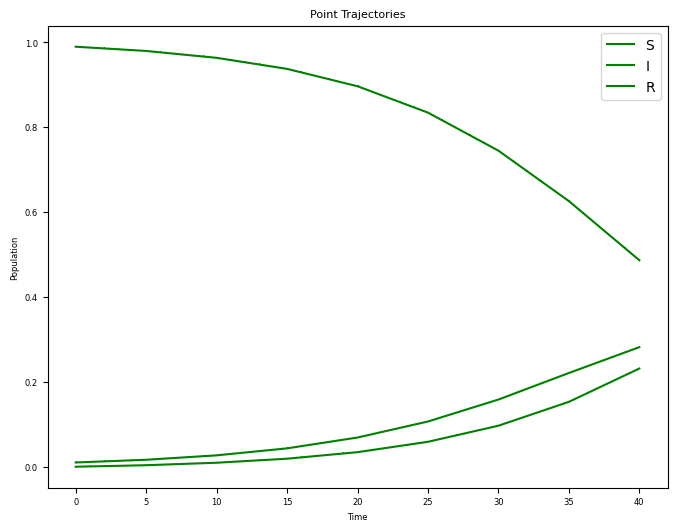

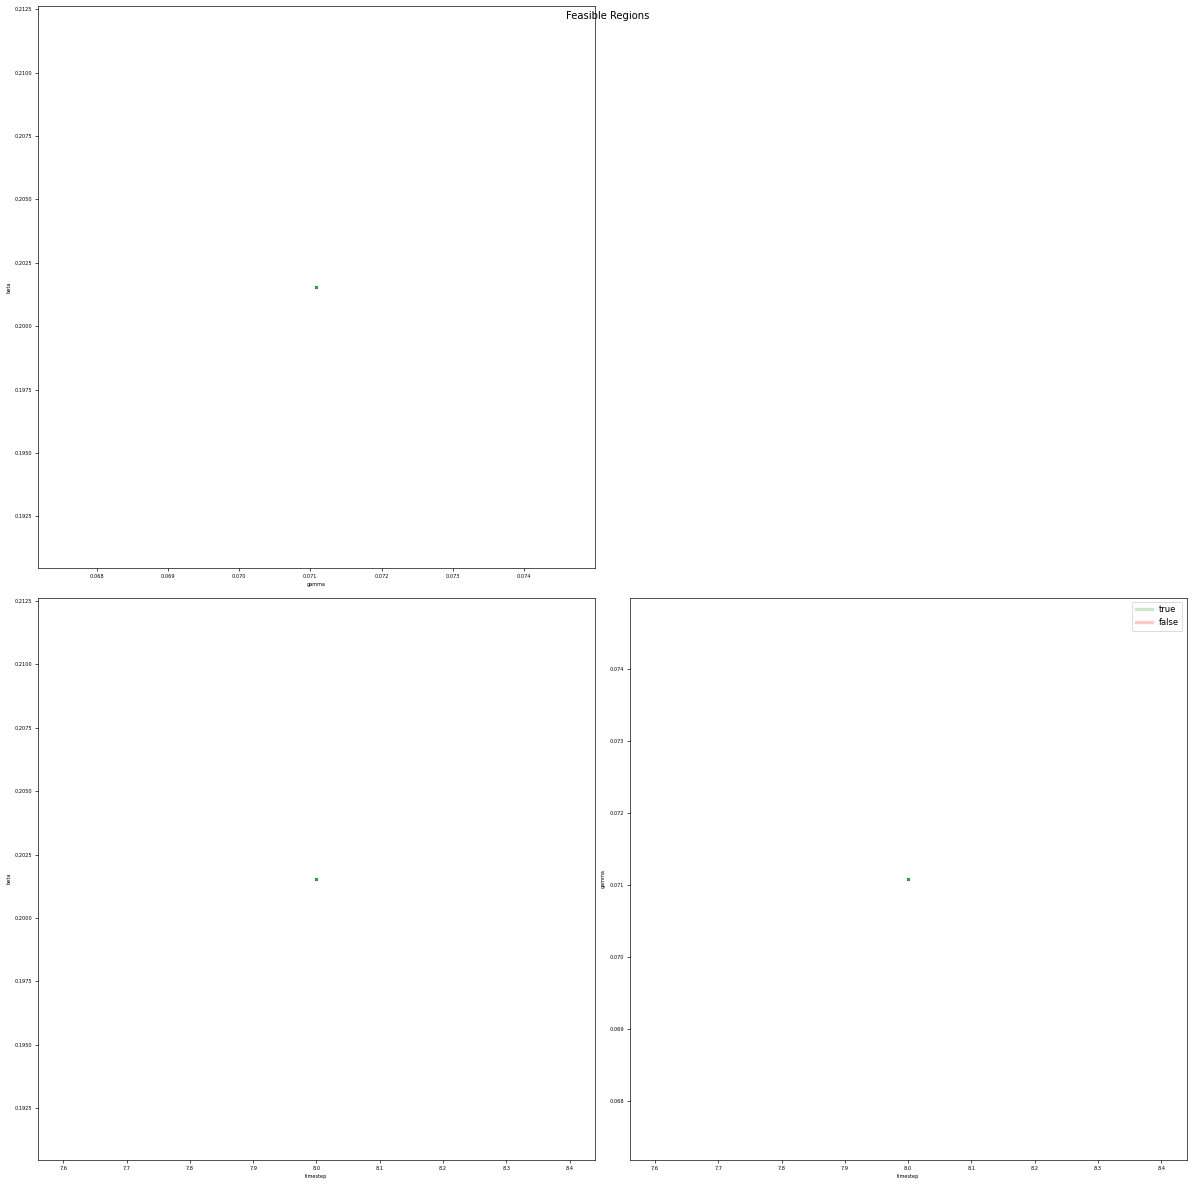

********************************************************************************
********************************************************************************
* Analysis Summary
********************************************************************************
1 Points (+:1, -:0), 1 Boxes (+:1, -:0)
Parameters = {beta[0.201544, 0.201544): 0.201544, gamma[0.07108600000000001, 0.07108600000000001): 0.07108600000000001, S0[0.9900000000000001, 0.9900000000000001): 0.9900000000000001, I0[0.01, 0.01): 0.01, R0[0.0, 0.0): 0.0, N[1.0, 1.0): 1.0}
        # {beta[0.201544, 0.201544): 0.201544, gamma[0.07108600000000001, 0.07108600000000001): 0.07108600000000001, S0[0.9900000000000001, 0.9900000000000001): 0.9900000000000001, I0[0.01, 0.01): 0.01, R0[0.0, 0.0): 0.0, N[1.0, 1.0): 1.0}
                     I    I0    N         R   R0         S    S0      beta     gamma  \
time                                                                           
0.0   0.010000  0.01  1.0  0.000000  0.0  0.990

In [22]:
# Consistency

STATES = ["S", "I", "R"]
COMPARTMENTS = STATES
MAX_TIME=40
STEP_SIZE=5
to_synthesize=["beta", "gamma"]

REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "sir_request_consistency.json"
)

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
 
    funman_request.structure_parameters[0].interval.lb = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[0].interval.ub = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[1].interval.lb = STEP_SIZE
    funman_request.structure_parameters[1].interval.ub = STEP_SIZE

    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIR Consistency",
            case_out_dir=SAVED_RESULTS_DIR,
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population",  parameters_to_plot=to_synthesize+["timestep"], synthesized_parameters=to_synthesize+["timestep"])
    print(summary)

[0.99000, 0.99000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01000, 0.01000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.00000, 0.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[1.00000, 1.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[30.00000, 30.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[30.00000, 30.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[30.00000, 30.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[2.00000, 2.00000) has equal lower and upper bounds, so assuming the upper bo

2024-05-03 19:15:47,887 - funman.scenario.consistency - INFO - 8{40}:	[+]
2024-05-03 19:15:47,891 - funman.server.worker - INFO - Completed work on: 0ce4ccb0-d783-4455-8f96-a78f926b0cc6
2024-05-03 19:15:50,950 - funman.server.worker - INFO - Worker.stop() acquiring state lock ....
2024-05-03 19:15:51,397 - funman.server.worker - INFO - FunmanWorker exiting...
2024-05-03 19:15:51,401 - funman.server.worker - INFO - Worker.stop() completed.


Total # of ibex-fwdbwd Pruning                @ Pruning level        =           15369
Total # of ibex-fwdbwd Pruning (zero-effect)  @ Pruning level        =            7208
Total time spent in Pruning                   @ Pruning level        =        0.016091 sec
Total time spent in making constraints        @ Pruning level        =        0.000000 sec
Total # of Convert                            @ Ibex Converter       =              47
Total time spent in Converting                @ Ibex Converter       =        0.000349 sec


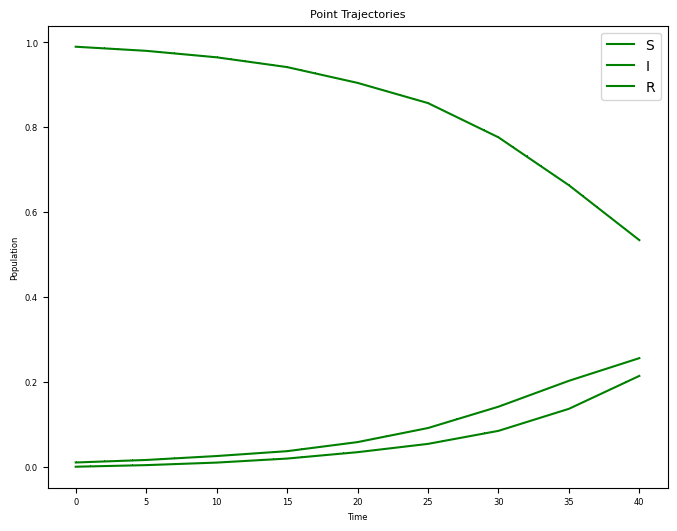

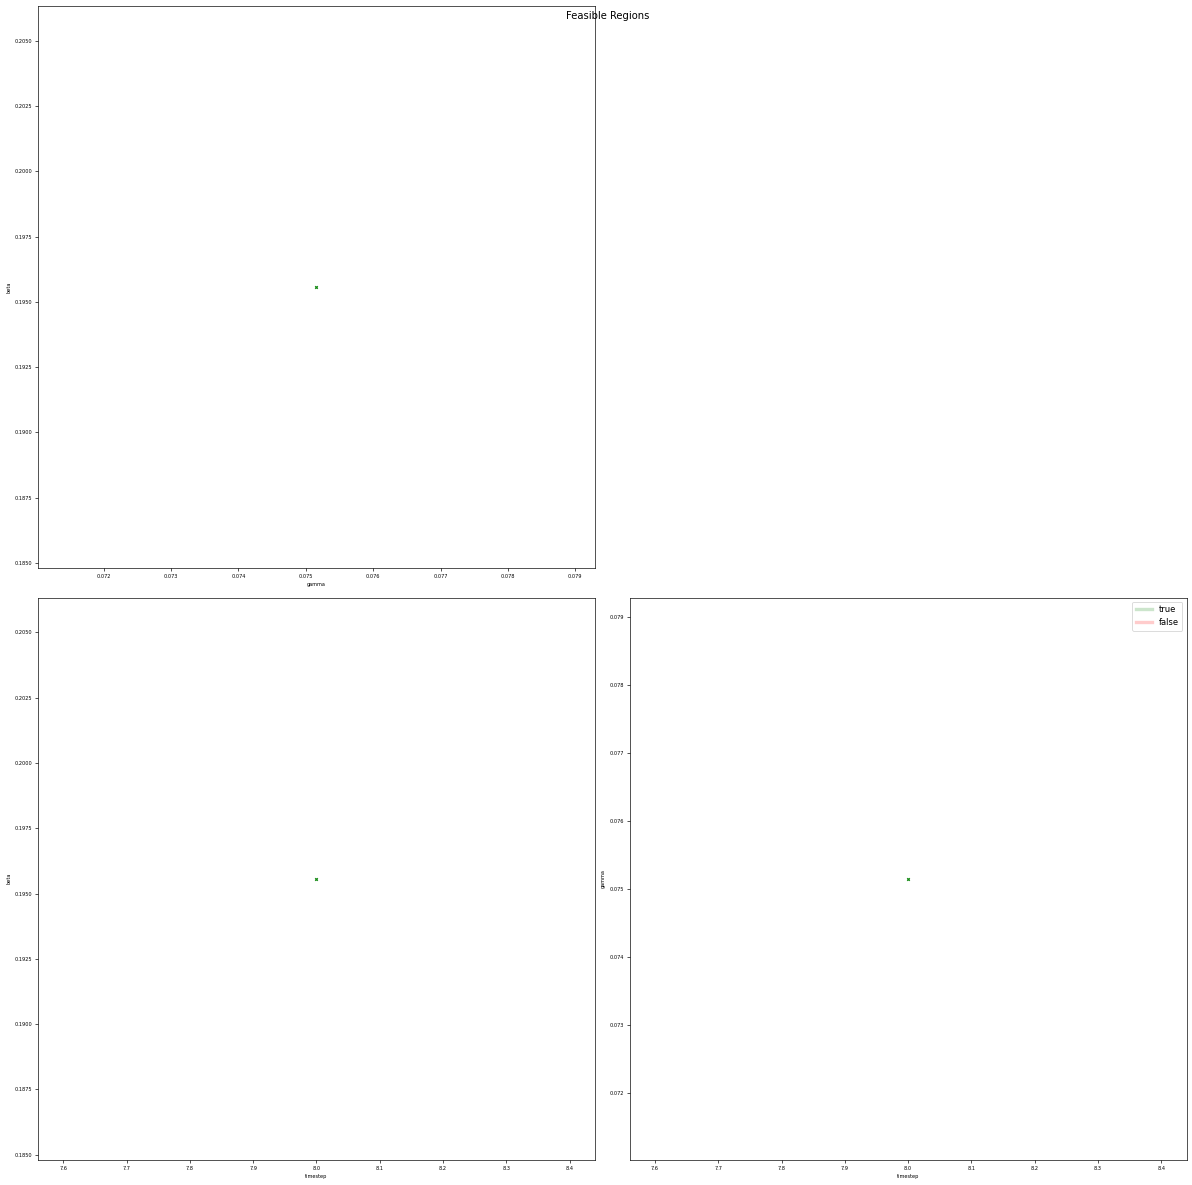

********************************************************************************
********************************************************************************
* Analysis Summary
********************************************************************************
1 Points (+:1, -:0), 1 Boxes (+:1, -:0)
Parameters = {beta[0.19, 0.2): 0.19556453743160776, gamma[0.060000000000000005, 0.08): 0.07515759581524381, S0[0.9900000000000001, 0.9900000000000001): 0.9900000000000001, I0[0.01, 0.01): 0.01, R0[0.0, 0.0): 0.0, N[1.0, 1.0): 1.0}
        # {beta[0.19, 0.2): 0.19556453743160776, gamma[0.060000000000000005, 0.08): 0.07515759581524381, S0[0.9900000000000001, 0.9900000000000001): 0.9900000000000001, I0[0.01, 0.01): 0.01, R0[0.0, 0.0): 0.0, N[1.0, 1.0): 1.0}
                     I    I0    N         R   R0         S    S0      beta     gamma  \
time                                                                           
0.0   0.010000  0.01  1.0  0.000000  0.0  0.990000  0.99  0.195565  0.0

In [20]:
# Parameterization

STATES = ["S", "I", "R"]
COMPARTMENTS = STATES
MAX_TIME=40
STEP_SIZE=5
to_synthesize=["beta", "gamma"]

REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "sir_request_parameterization.json"
)

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
 
    funman_request.structure_parameters[0].interval.lb = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[0].interval.ub = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[1].interval.lb = STEP_SIZE
    funman_request.structure_parameters[1].interval.ub = STEP_SIZE

    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIR Parameterization",
            case_out_dir=SAVED_RESULTS_DIR,
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population",  parameters_to_plot=to_synthesize+["timestep"], synthesized_parameters=to_synthesize+["timestep"])
    print(summary)

,time,progress,duration
0,2024-05-03 18:49:19.694812,0.111111,0.000000
1,2024-05-03 18:49:21.094546,0.777778,0.023329
2,2024-05-03 18:49:22.277198,0.777778,0.043040
3,2024-05-03 18:49:23.796146,0.798711,0.068356
4,2024-05-03 18:49:24.881772,0.802976,0.086449
...,...,...,...
118,2024-05-03 18:56:59.675340,0.893126,7.666342
119,2024-05-03 18:57:02.575258,0.897838,7.714674
120,2024-05-03 18:57:06.473239,0.899279,7.779640
121,2024-05-03 18:57:12.525948,0.899279,7.880519


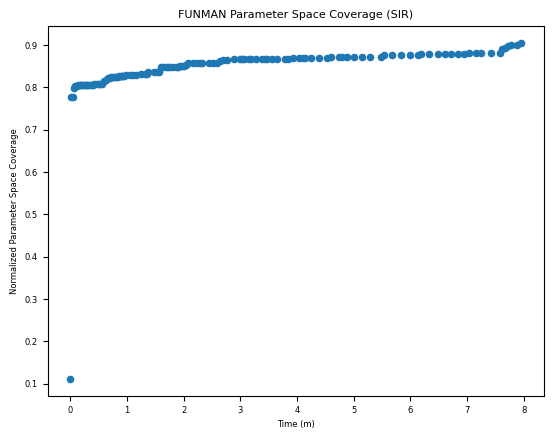

In [18]:
from funman import FunmanResults
import json
import pandas as pd
from datetime import datetime
# Load FUNMAN output and plot the progress data
# data = results_unconstrained_point
with open("out/278ddfbc-6176-48a1-b232-ac471b56c20d.json", "r") as f:
    data = FunmanResults.model_validate(json.loads(f.read()))
df = pd.DataFrame.from_records(data.timing.progress_timeseries, columns=["time", "progress"])
df['duration'] = df.time.apply(lambda x: (x-df.time.iloc[0]).total_seconds()/60)
df = df[0:123]
ax = df.plot.scatter(x="duration", y="progress")
ax.set_xlabel("Time (m)")
ax.set_ylabel("Normalized Parameter Space Coverage")
ax.set_title("FUNMAN Parameter Space Coverage (SIR)")
df

[0.99000, 0.99000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01000, 0.01000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.00000, 0.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[1.00000, 1.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])


Automatic initialization of gaol... done
[11.00000, 11.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[11.00000, 11.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[11.00000, 11.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[5.00000, 5.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[5.00000, 5.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[5.00000, 5.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.20000, 0.20000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.20000, 0.20000) has equal lower a

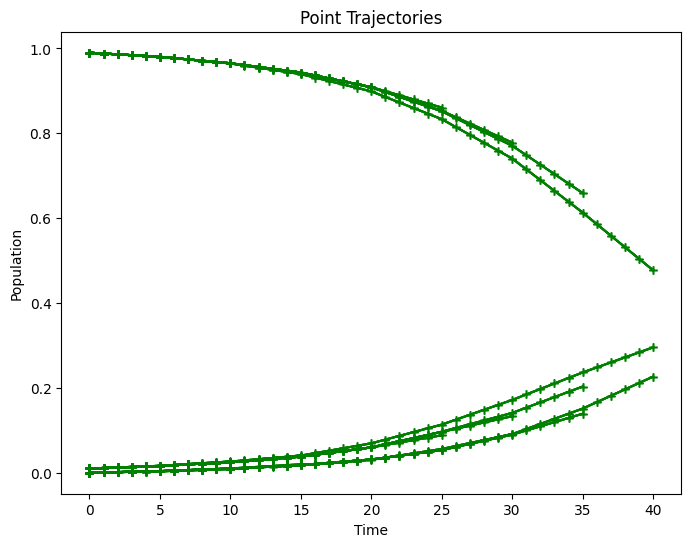

2024-05-03 18:49:34,578 - funman.api.run - INFO - Creating plot of parameter space: ./out/278ddfbc-6176-48a1-b232-ac471b56c20d_parameter_space.png
2024-05-03 18:49:35,314 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.19615410264546246, 0.196779154745322)][(0.196779154745322, 0.19711578538353508)])
2024-05-03 18:49:35,324 - funman.representation.box - INFO - widths: 0.00204 -> 0.00204 0.00204 (raw), 0.10196 -> 0.10196 0.10196 (norm)
2024-05-03 18:49:35,331 - funman.search.box_search - INFO - progress: 0.80560
2024-05-03 18:49:36,407 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.19711578538353508, 0.19735620606805324)][(0.19735620606805324, 0.19769262830682807)])
2024-05-03 18:49:36,417 - funman.representation.box - INFO - widths: 0.00204 -> 0.00204 0.00204 (raw), 0.10196 -> 0.10196 0.10196 (norm)
2024-05-03 18:49:36,425 - funman.search.box_search - INFO - progress: 0.80560
2024-05-03 18:49:36,808 - funman.representation.box - INFO - Spli

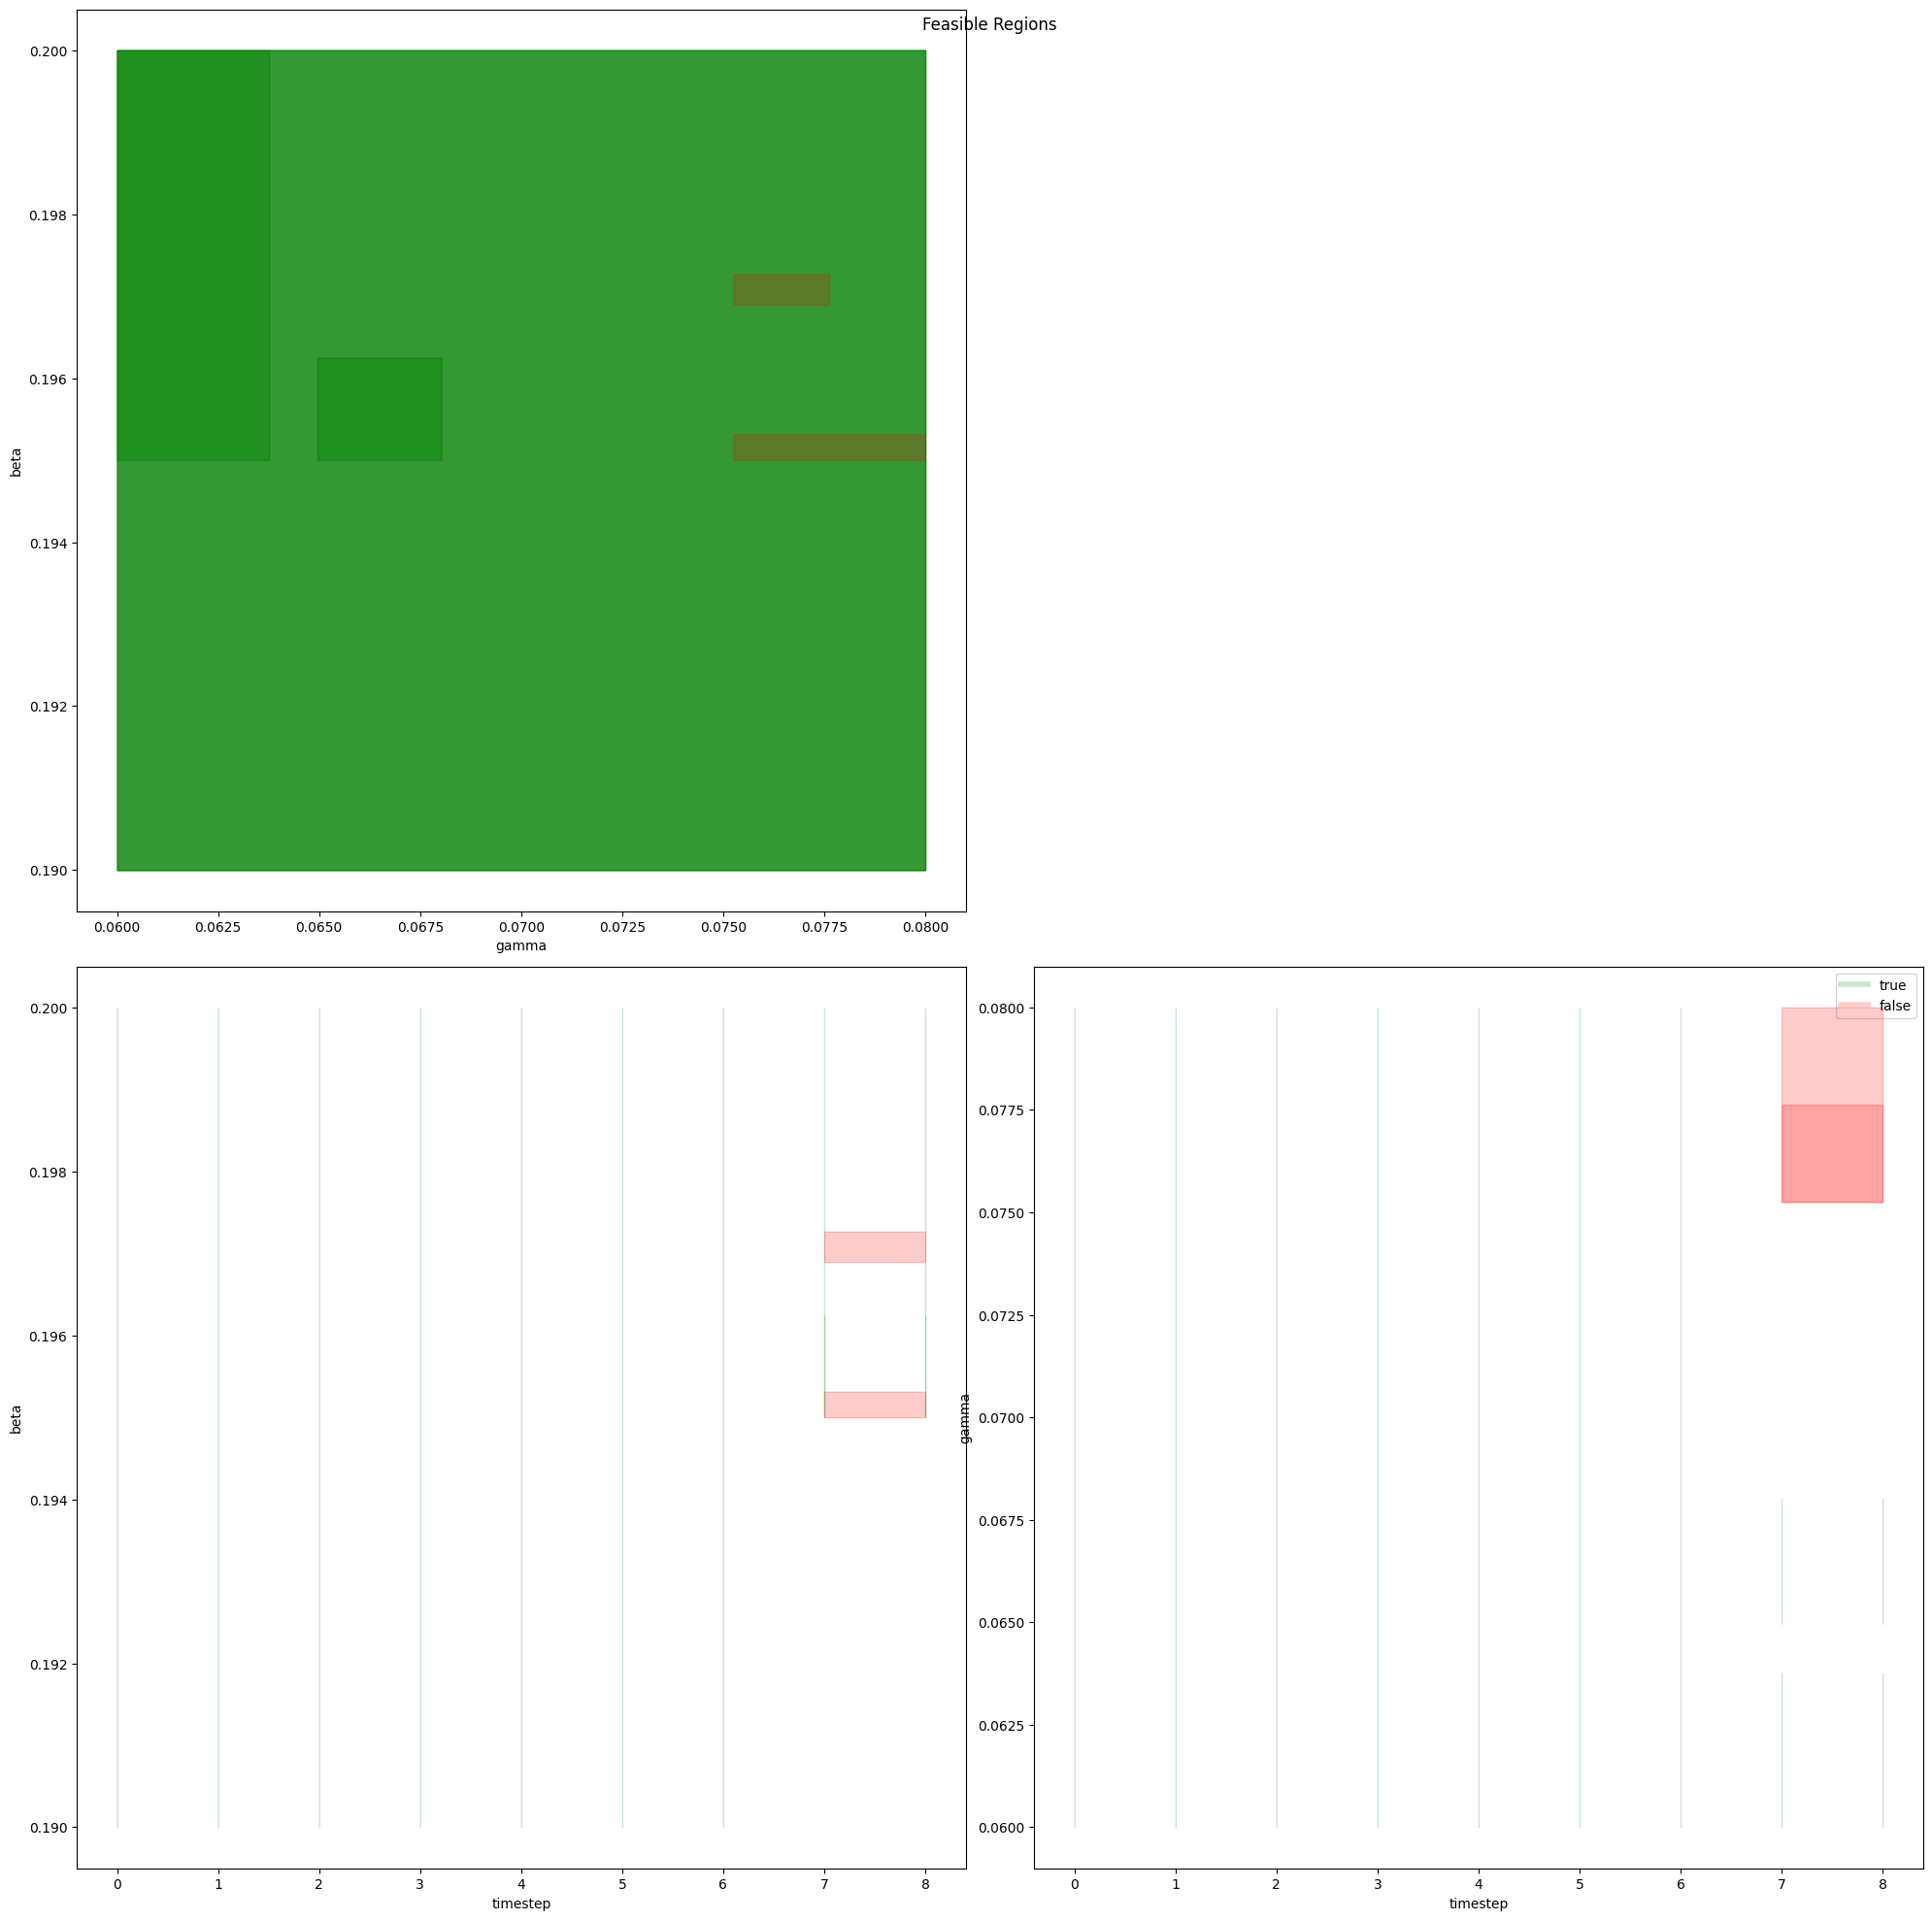

2024-05-03 18:50:08,620 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.195, 0.19528852566136562)][(0.19528852566136562, 0.19615410264546246)])
2024-05-03 18:50:08,622 - funman.representation.box - INFO - widths: 0.00204 -> 0.00204 0.00204 (raw), 0.11541 -> 0.10196 0.10196 (norm)
2024-05-03 18:50:08,627 - funman.search.box_search - INFO - progress: 0.82368
2024-05-03 18:50:10,713 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.07525484352275963, 0.07703427720172477)][(0.07703427720172477, 0.07762742176137982)])
2024-05-03 18:50:10,717 - funman.representation.box - INFO - widths: 0.00237 -> 0.00178 0.00060 (raw), 0.11863 -> 0.08897 0.06006 (norm)
2024-05-03 18:50:10,723 - funman.search.box_search - INFO - progress: 0.82368
2024-05-03 18:50:11,532 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.07525484352275963, 0.07703427720172477)][(0.07703427720172477, 0.07762742176137982)])
2024-05-03 18:50:11,534 - funman.repres

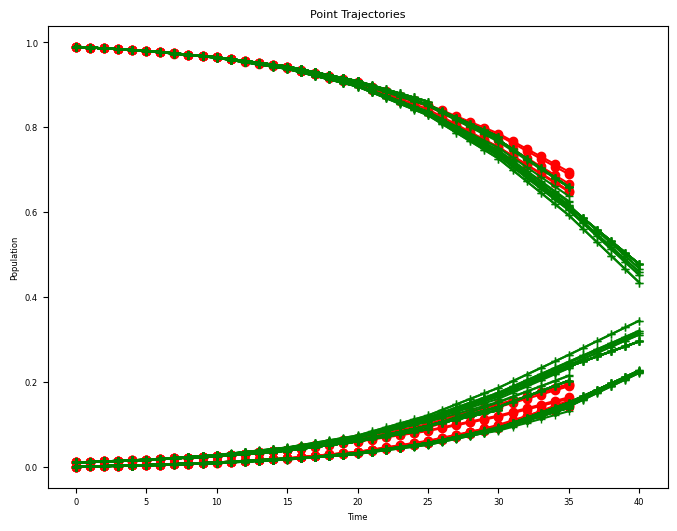

2024-05-03 18:50:35,392 - funman.api.run - INFO - Creating plot of parameter space: ./out/278ddfbc-6176-48a1-b232-ac471b56c20d_parameter_space.png
2024-05-03 18:50:38,580 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.1925, 0.19375)][(0.19375, 0.195)])
2024-05-03 18:50:38,587 - funman.representation.box - INFO - widths: 0.00339 -> 0.00339 0.00339 (raw), 0.25000 -> 0.16961 0.16961 (norm)
2024-05-03 18:50:38,598 - funman.search.box_search - INFO - progress: 0.83061
2024-05-03 18:50:38,836 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.07660785789289051, 0.07830392894644526)][(0.07830392894644526, 0.08)])
2024-05-03 18:50:38,839 - funman.representation.box - INFO - widths: 0.00339 -> 0.00170 0.00170 (raw), 0.16961 -> 0.12500 0.12500 (norm)
2024-05-03 18:50:38,850 - funman.search.box_search - INFO - progress: 0.83061
2024-05-03 18:50:40,643 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.07321571578578102, 0.074911786

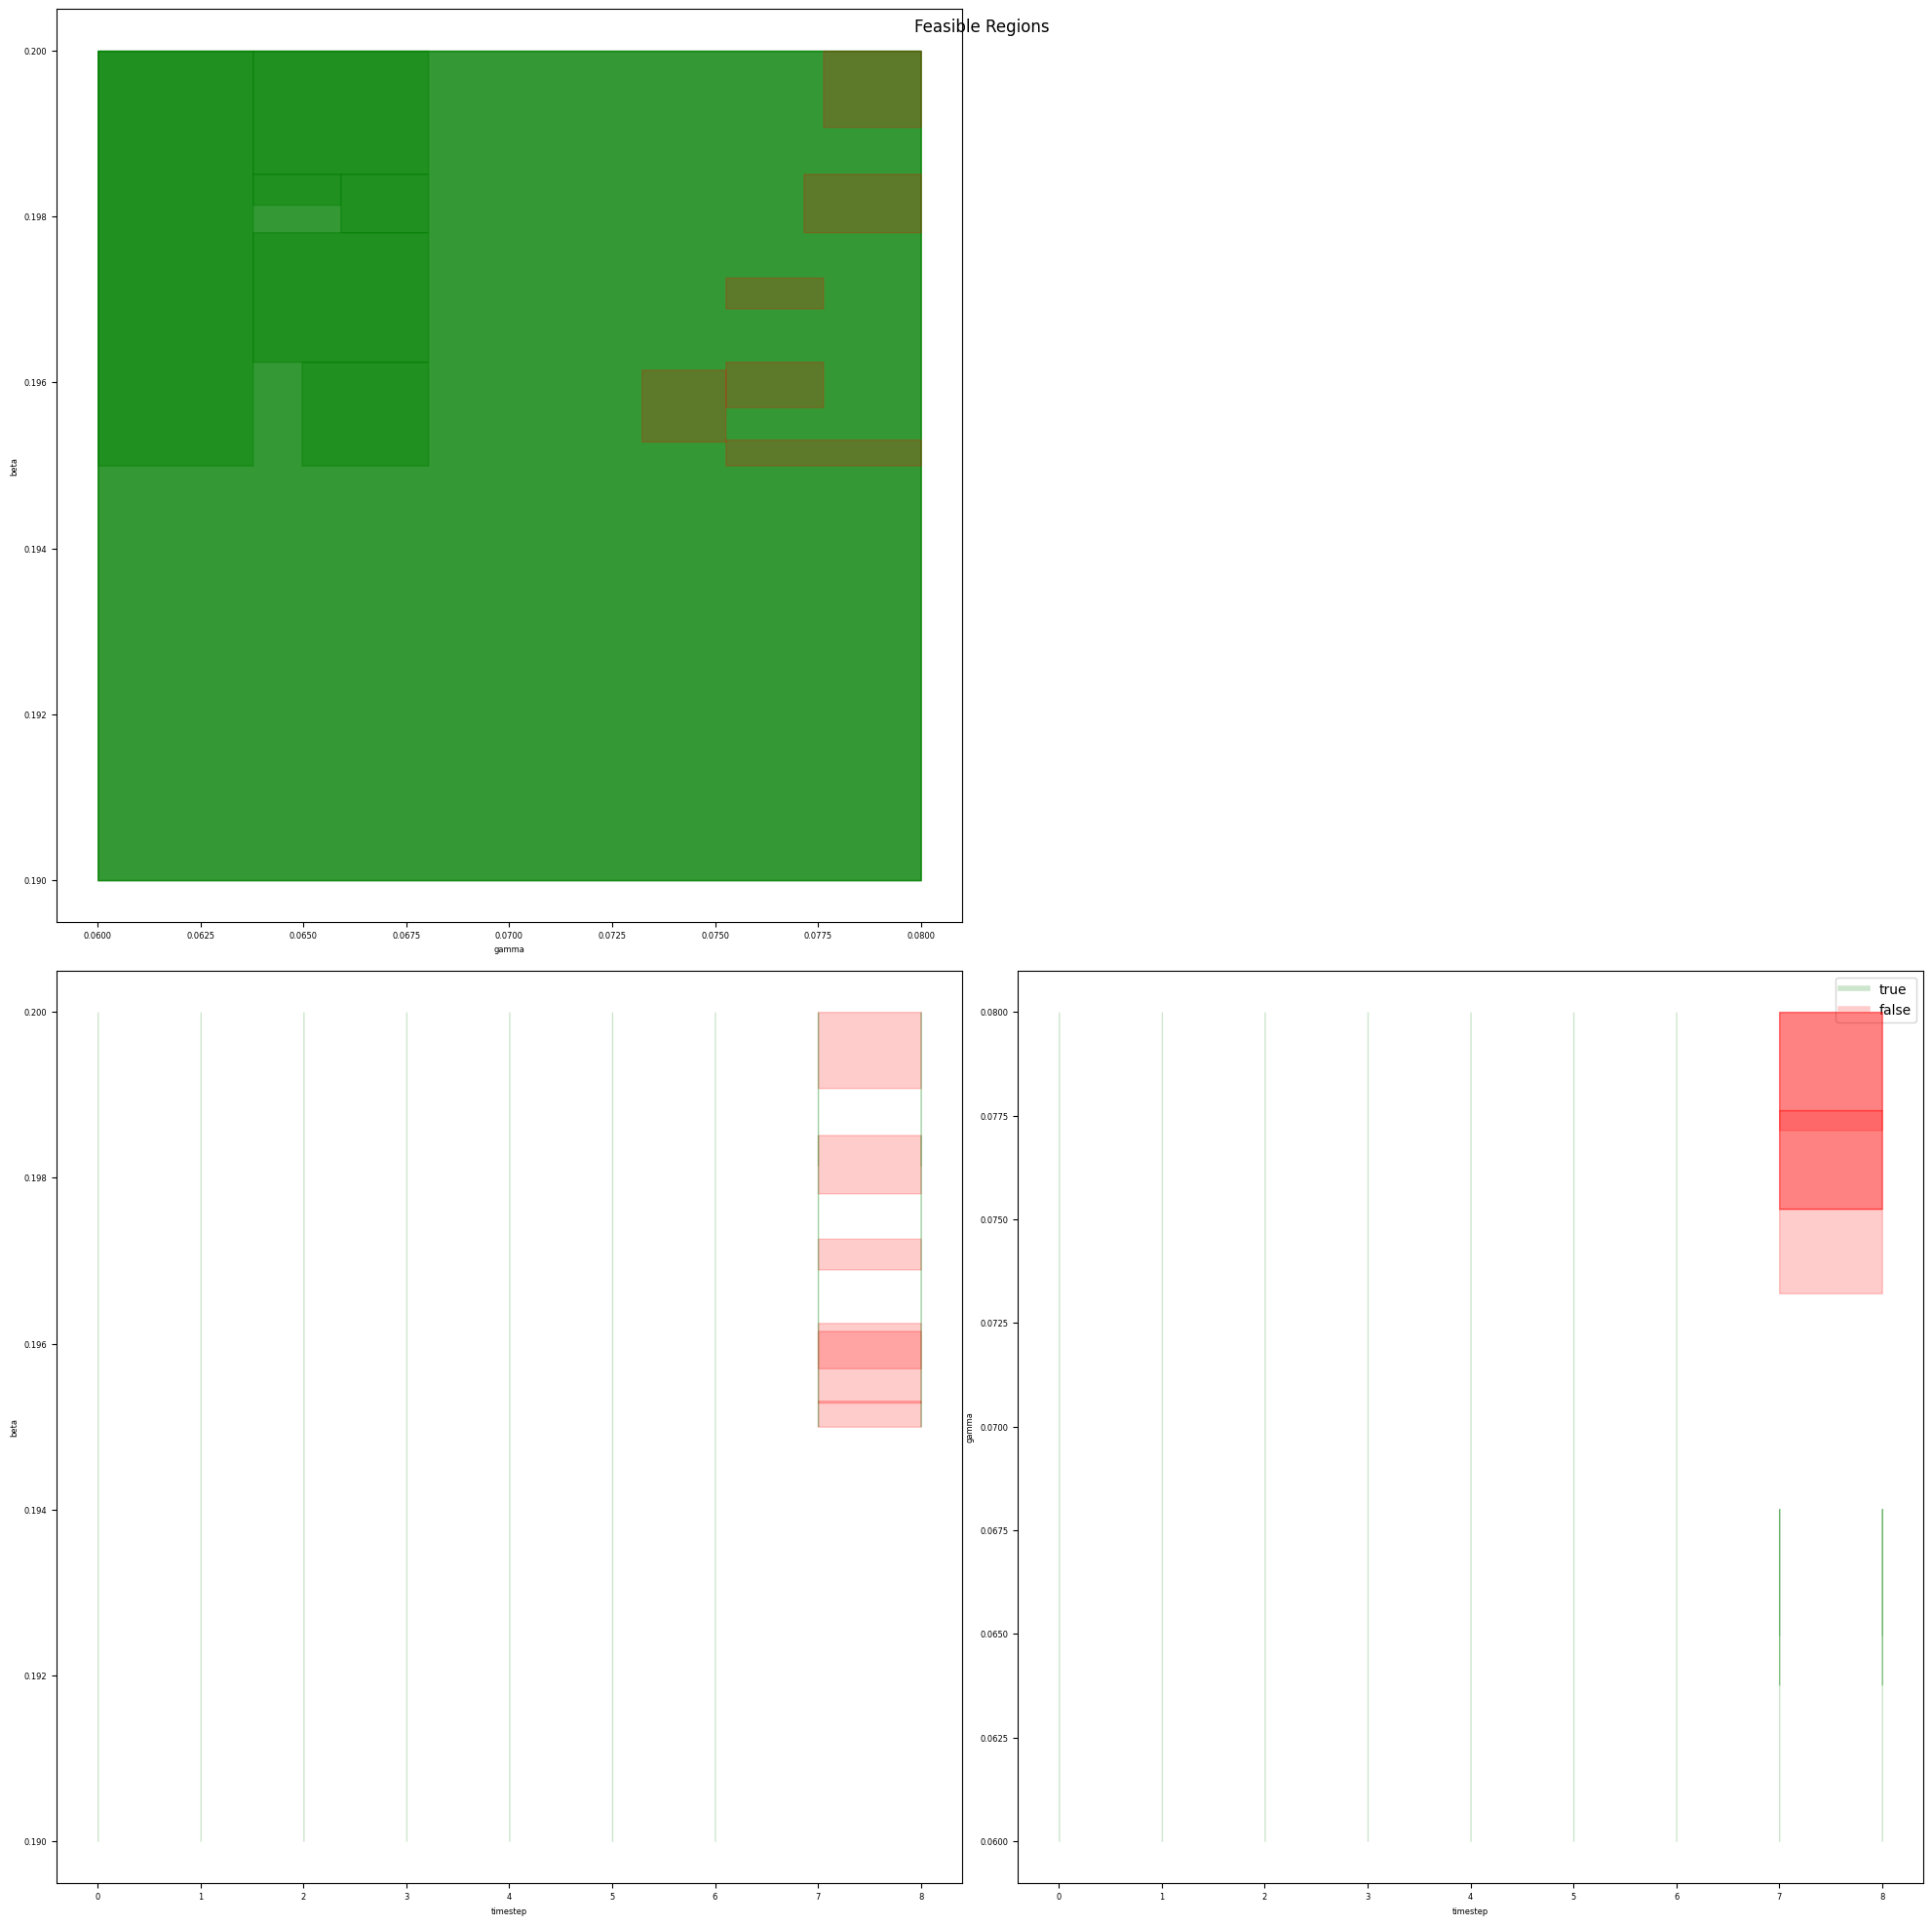

2024-05-03 18:51:20,217 - funman.search.box_search - INFO - progress: 0.85098
2024-05-03 18:51:20,383 - funman.search.box_search - INFO - progress: 0.85135
2024-05-03 18:51:22,359 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.06559638406459783, 0.0668112829949301)][(0.0668112829949301, 0.06802618192526234)])
2024-05-03 18:51:22,361 - funman.representation.box - INFO - widths: 0.00243 -> 0.00121 0.00121 (raw), 0.12149 -> 0.06074 0.06074 (norm)
2024-05-03 18:51:22,366 - funman.search.box_search - INFO - progress: 0.85135
2024-05-03 18:51:24,471 - funman.search.box_search - INFO - progress: 0.85606
2024-05-03 18:51:29,242 - funman.api.run - INFO - Dumping results to ./out/278ddfbc-6176-48a1-b232-ac471b56c20d.json
2024-05-03 18:51:29,357 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.19, 0.195)][(0.195, 0.2)])
2024-05-03 18:51:29,360 - funman.representation.box - INFO - widths: 0.01000 -> 0.00519 0.00519 (raw), 1.00000 -> 0.50000 0.50000 (n

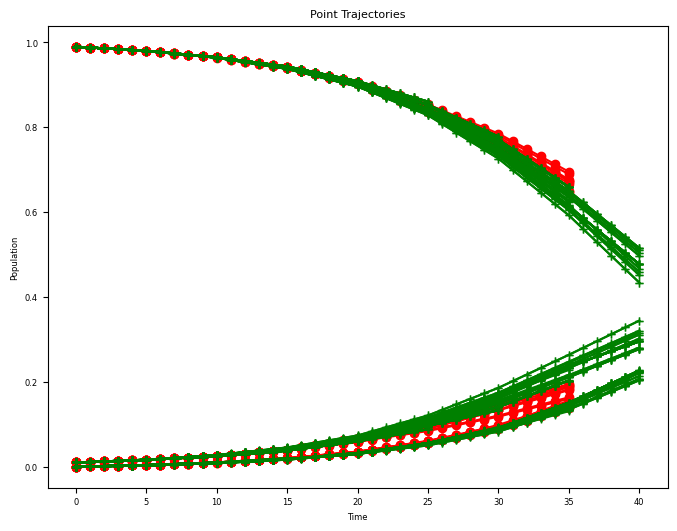

2024-05-03 18:51:48,712 - funman.api.run - INFO - Creating plot of parameter space: ./out/278ddfbc-6176-48a1-b232-ac471b56c20d_parameter_space.png
2024-05-03 18:51:51,217 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.06802618192526234, 0.06945961957653388)][(0.06945961957653388, 0.0702108388183833)])
2024-05-03 18:51:51,221 - funman.representation.box - INFO - widths: 0.00218 -> 0.00143 0.00075 (raw), 0.10923 -> 0.07167 0.03756 (norm)
2024-05-03 18:51:51,228 - funman.search.box_search - INFO - progress: 0.85606
2024-05-03 18:51:55,547 - funman.search.box_search - INFO - progress: 0.85761
2024-05-03 18:51:55,723 - funman.search.box_search - INFO - progress: 0.85917
2024-05-03 18:51:58,266 - funman.search.box_search - INFO - progress: 0.86164
2024-05-03 18:52:01,054 - funman.search.box_search - INFO - progress: 0.86431
2024-05-03 18:52:05,824 - funman.search.box_search - INFO - progress: 0.86509
2024-05-03 18:52:05,983 - funman.search.box_search - INFO - progres

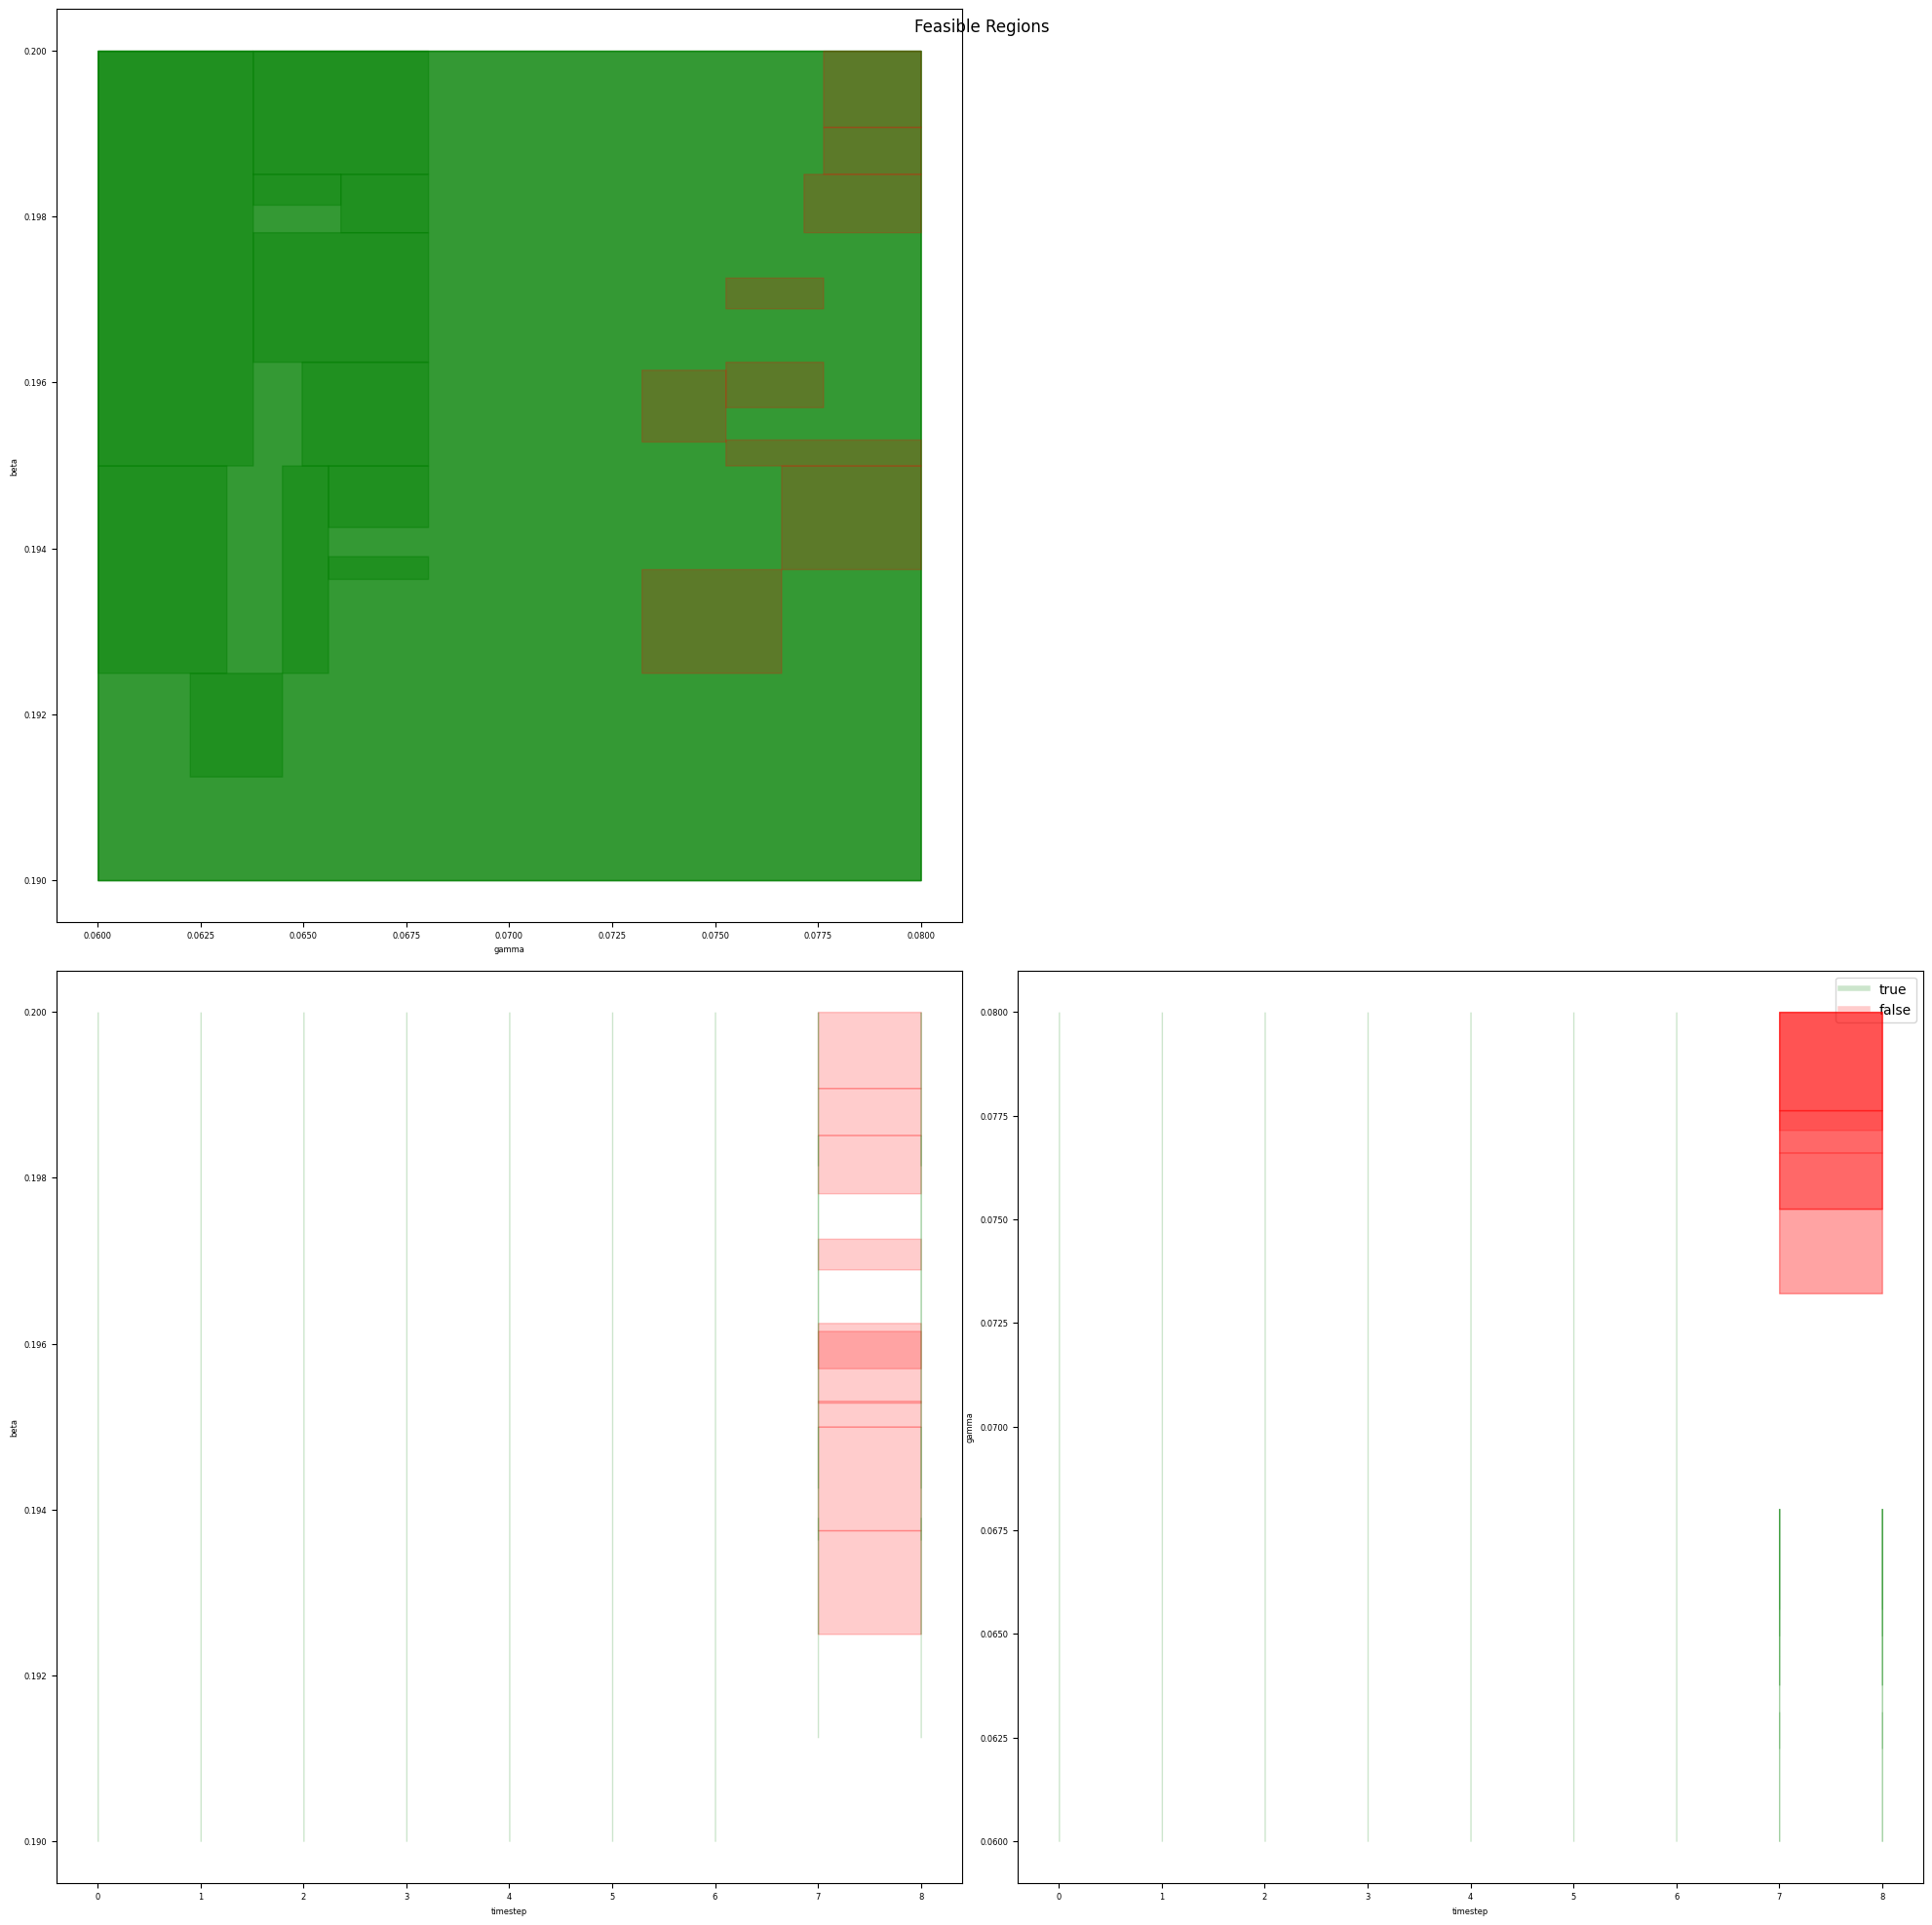

2024-05-03 18:52:48,119 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.06802618192526234, 0.06987243486814936)][(0.06987243486814936, 0.0715752756372275)])
2024-05-03 18:52:48,121 - funman.representation.box - INFO - widths: 0.00355 -> 0.00185 0.00170 (raw), 0.17745 -> 0.09231 0.08514 (norm)
2024-05-03 18:52:48,126 - funman.search.box_search - INFO - progress: 0.86742
2024-05-03 18:52:53,099 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.06948336412791874, 0.07016502433190902)][(0.07016502433190902, 0.0715752756372275)])
2024-05-03 18:52:53,102 - funman.representation.box - INFO - widths: 0.00209 -> 0.00070 0.00141 (raw), 0.10460 -> 0.07031 0.07051 (norm)
2024-05-03 18:52:53,108 - funman.search.box_search - INFO - progress: 0.86742
2024-05-03 18:52:57,919 - funman.api.run - INFO - Dumping results to ./out/278ddfbc-6176-48a1-b232-ac471b56c20d.json
2024-05-03 18:52:58,017 - funman.api.run - INFO - Creating plot of point trajectories: ./ou

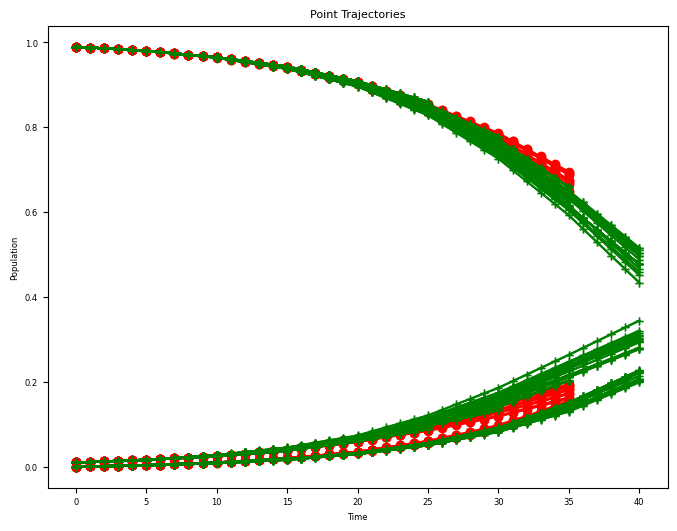

2024-05-03 18:53:20,604 - funman.api.run - INFO - Creating plot of parameter space: ./out/278ddfbc-6176-48a1-b232-ac471b56c20d_parameter_space.png
2024-05-03 18:53:21,832 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.195, 0.19625)][(0.19625, 0.2)])
2024-05-03 18:53:21,836 - funman.representation.box - INFO - widths: 0.00500 -> 0.00164 0.00375 (raw), 0.50000 -> 0.12500 0.37500 (norm)
2024-05-03 18:53:21,867 - funman.search.box_search - INFO - progress: 0.86868
2024-05-03 18:53:25,769 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.19625, 0.1978125)][(0.1978125, 0.2)])
2024-05-03 18:53:25,771 - funman.representation.box - INFO - widths: 0.00375 -> 0.00164 0.00219 (raw), 0.37500 -> 0.15625 0.21875 (norm)
2024-05-03 18:53:25,779 - funman.search.box_search - INFO - progress: 0.86868
2024-05-03 18:53:28,275 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.19625, 0.197265625)][(0.197265625, 0.1978125)])
2024-05-03 18:53:28,

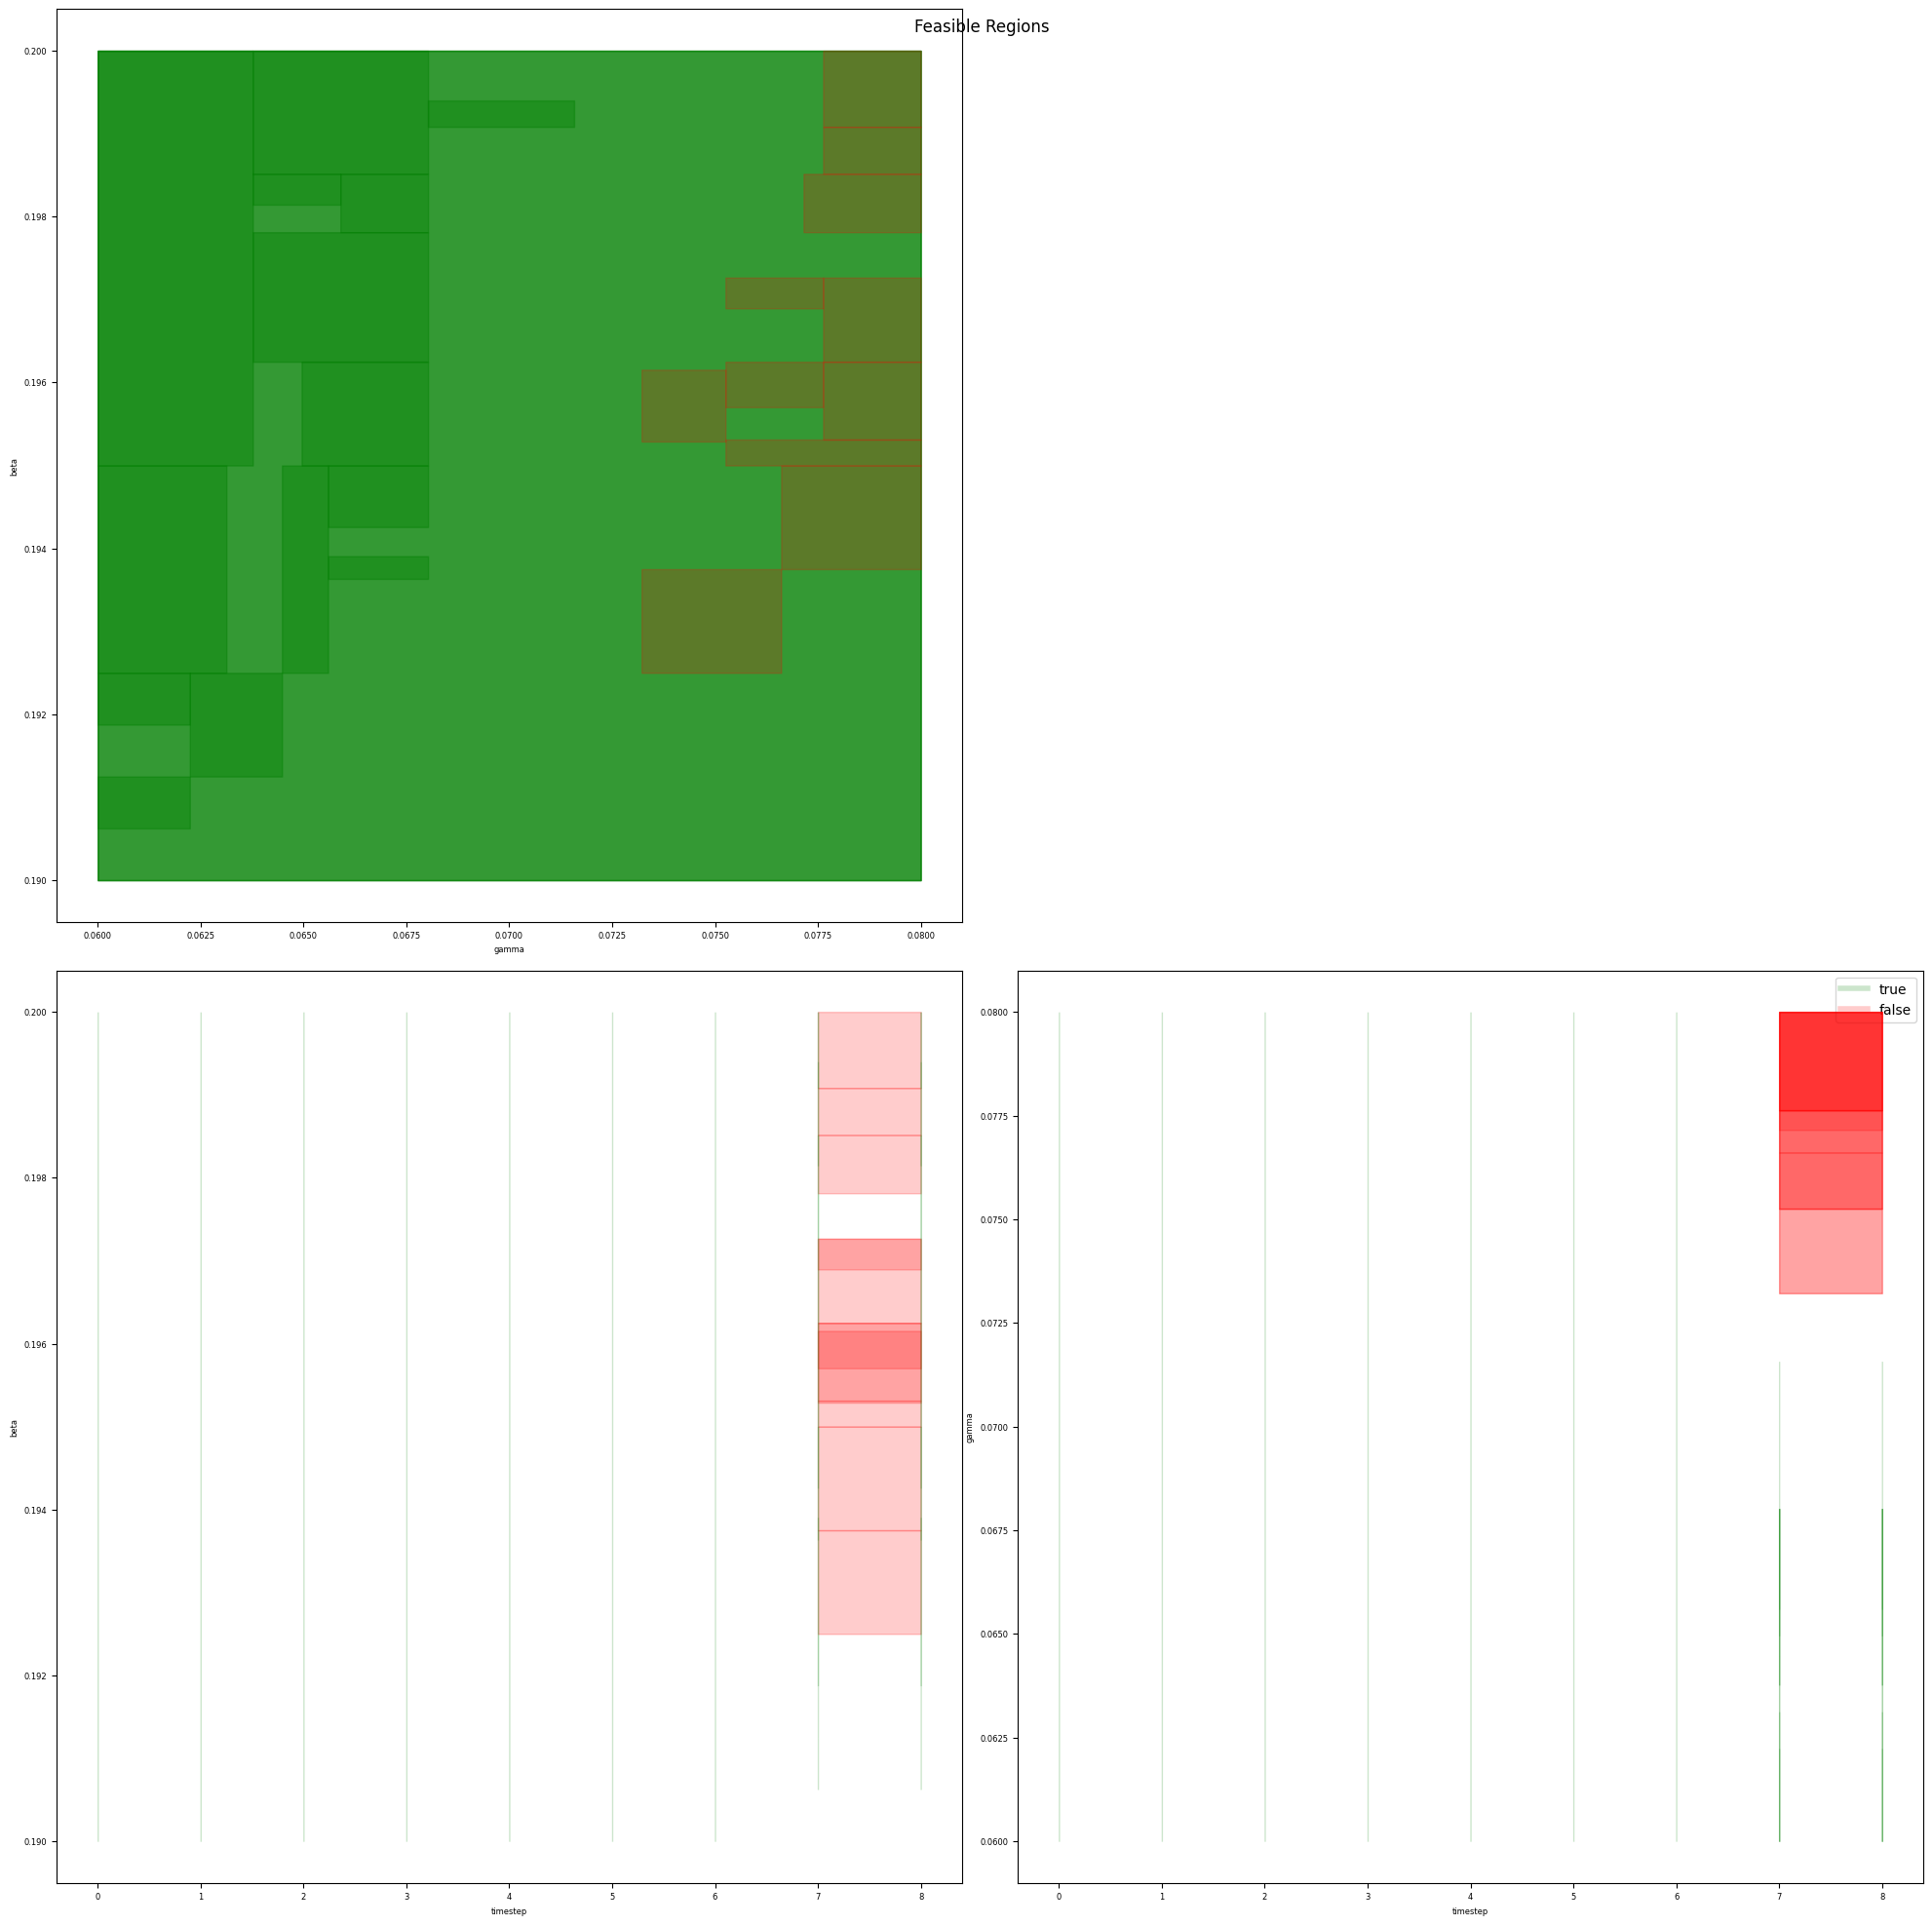

2024-05-03 18:54:28,775 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.07062094885552168, 0.07191833232065135)][(0.07191833232065135, 0.07321571578578102)])
2024-05-03 18:54:28,778 - funman.representation.box - INFO - widths: 0.00259 -> 0.00130 0.00130 (raw), 0.12974 -> 0.12500 0.12500 (norm)
2024-05-03 18:54:28,784 - funman.search.box_search - INFO - progress: 0.87228
2024-05-03 18:54:28,801 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.19375, 0.19437500000000002)][(0.19437500000000002, 0.195)])
2024-05-03 18:54:28,802 - funman.representation.box - INFO - widths: 0.00130 -> 0.00130 0.00130 (raw), 0.12500 -> 0.06487 0.06487 (norm)
2024-05-03 18:54:28,808 - funman.search.box_search - INFO - progress: 0.87228
2024-05-03 18:54:36,895 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.19, 0.19125)][(0.19125, 0.1925)])
2024-05-03 18:54:36,898 - funman.representation.box - INFO - widths: 0.00355 -> 0.00355 0.00355 (raw), 0

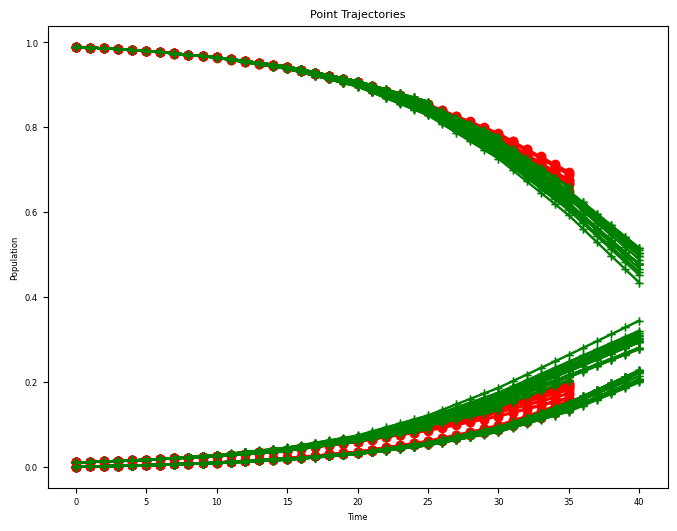

2024-05-03 18:55:04,222 - funman.api.run - INFO - Creating plot of parameter space: ./out/278ddfbc-6176-48a1-b232-ac471b56c20d_parameter_space.png
2024-05-03 18:55:09,810 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.19125, 0.19187500000000002)][(0.19187500000000002, 0.1925)])
2024-05-03 18:55:09,817 - funman.representation.box - INFO - widths: 0.00177 -> 0.00177 0.00177 (raw), 0.12500 -> 0.08873 0.08873 (norm)
2024-05-03 18:55:09,828 - funman.search.box_search - INFO - progress: 0.87588
2024-05-03 18:55:18,685 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.1925, 0.19375)][(0.19375, 0.195)])
2024-05-03 18:55:18,689 - funman.representation.box - INFO - widths: 0.00259 -> 0.00259 0.00259 (raw), 0.25000 -> 0.12974 0.12974 (norm)
2024-05-03 18:55:18,694 - funman.search.box_search - INFO - progress: 0.87588
2024-05-03 18:55:18,711 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.06802618192526234, 0.06932356539039201)][

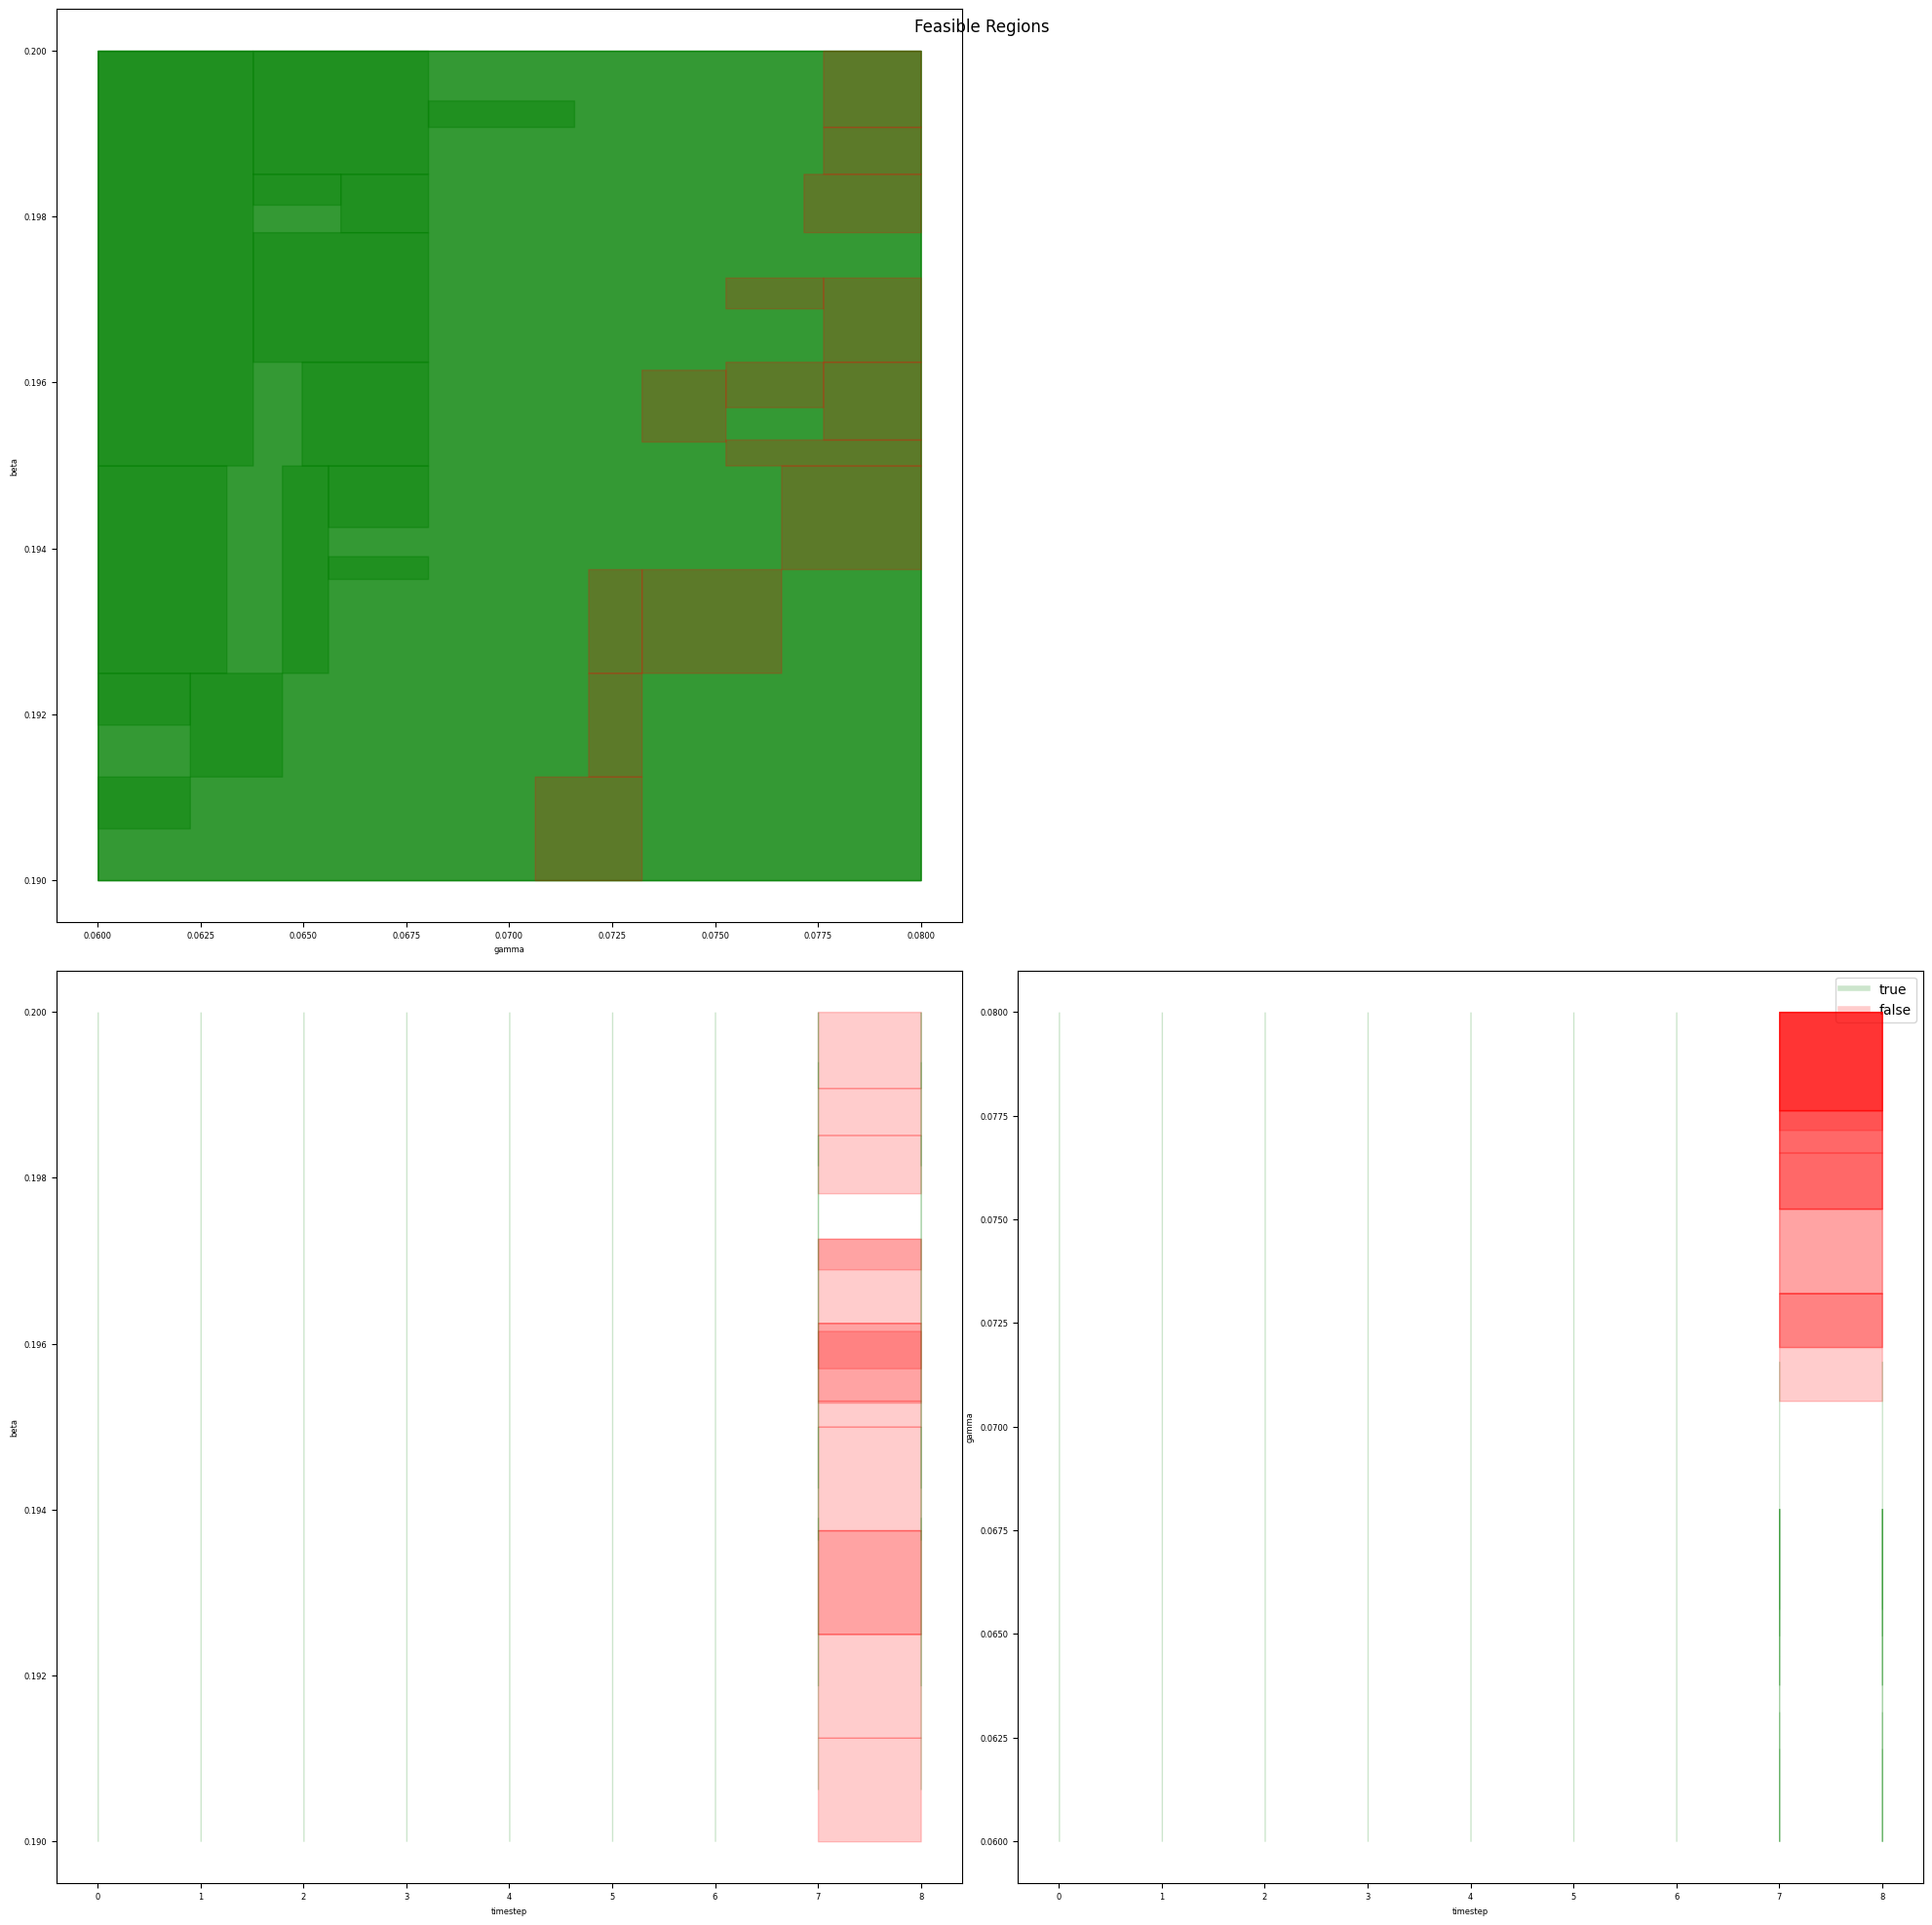

2024-05-03 18:56:16,037 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.19625, 0.19689453125)][(0.19689453125, 0.197265625)])
2024-05-03 18:56:16,039 - funman.representation.box - INFO - widths: 0.00164 -> 0.00164 0.00164 (raw), 0.10156 -> 0.08202 0.08202 (norm)
2024-05-03 18:56:16,045 - funman.search.box_search - INFO - progress: 0.87824
2024-05-03 18:56:21,568 - funman.search.box_search - INFO - progress: 0.87979
2024-05-03 18:56:21,849 - funman.search.box_search - INFO - progress: 0.88135
2024-05-03 18:56:25,575 - funman.api.run - INFO - Dumping results to ./out/278ddfbc-6176-48a1-b232-ac471b56c20d.json
2024-05-03 18:56:25,672 - funman.api.run - INFO - Creating plot of point trajectories: ./out/278ddfbc-6176-48a1-b232-ac471b56c20d_points.png
2024-05-03 18:56:28,631 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.1978125, 0.198515625)][(0.198515625, 0.2)])
2024-05-03 18:56:28,666 - funman.representation.box - INFO - widths: 0.00219 -> 0.0

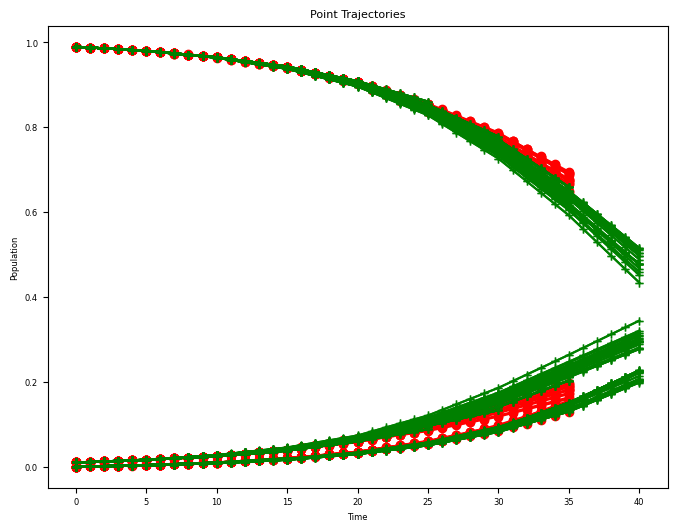

2024-05-03 18:56:52,929 - funman.api.run - INFO - Creating plot of parameter space: ./out/278ddfbc-6176-48a1-b232-ac471b56c20d_parameter_space.png
2024-05-03 18:56:54,552 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.07321571578578102, 0.07660785789289051)][(0.07660785789289051, 0.08)])
2024-05-03 18:56:54,555 - funman.representation.box - INFO - widths: 0.00678 -> 0.00339 0.00339 (raw), 0.33921 -> 0.25000 0.25000 (norm)
2024-05-03 18:56:54,563 - funman.search.box_search - INFO - progress: 0.88135
2024-05-03 18:56:54,581 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.19, 0.19125)][(0.19125, 0.1925)])
2024-05-03 18:56:54,583 - funman.representation.box - INFO - widths: 0.00339 -> 0.00339 0.00339 (raw), 0.25000 -> 0.16961 0.16961 (norm)
2024-05-03 18:56:54,599 - funman.search.box_search - INFO - progress: 0.88135
2024-05-03 18:56:54,628 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.07660785789289051, 0.0783039289

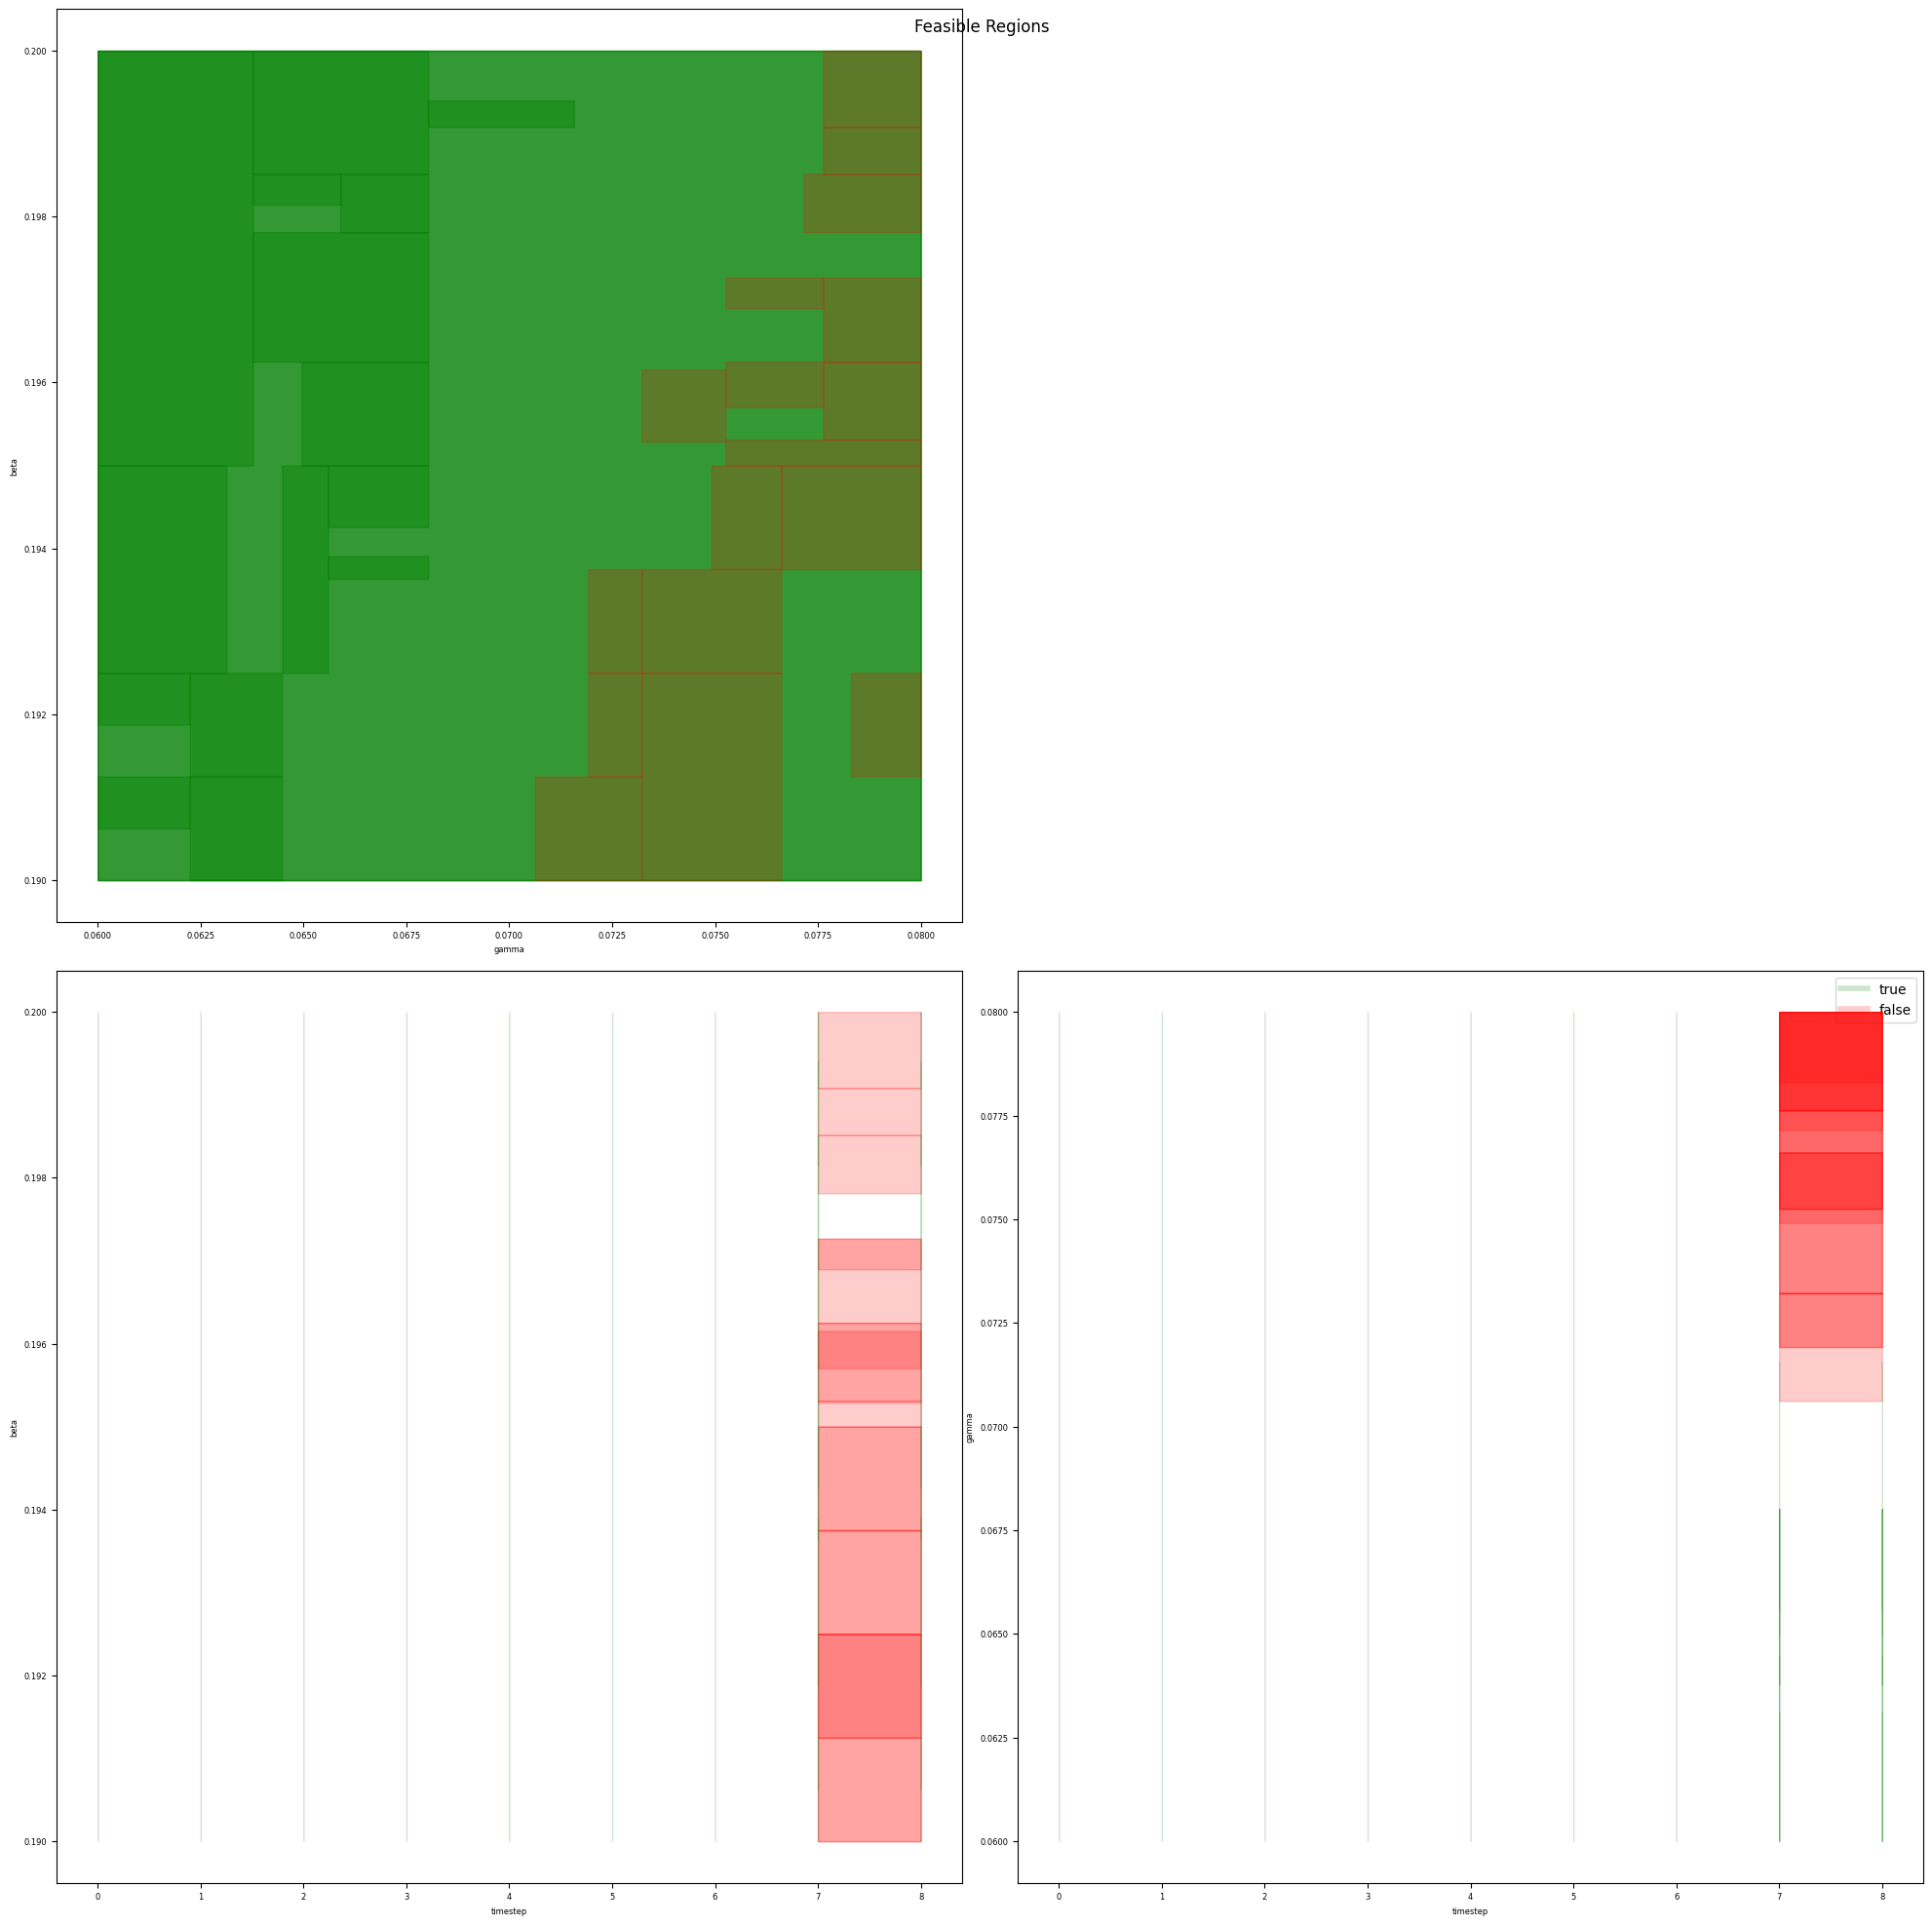

2024-05-03 18:57:36,228 - funman.server.worker - INFO - Worker.stop() acquiring state lock ....
2024-05-03 18:57:36,235 - funman.server.worker - INFO - FunmanWorker exiting...
2024-05-03 18:57:36,238 - funman.server.worker - INFO - Worker.stop() completed.


Total # of ibex-fwdbwd Pruning                @ Pruning level        =          825595
Total # of ibex-fwdbwd Pruning (zero-effect)  @ Pruning level        =          456413
Total time spent in Pruning                   @ Pruning level        =        1.181741 sec
Total time spent in making constraints        @ Pruning level        =        0.000000 sec
Total # of Convert                            @ Ibex Converter       =              78
Total time spent in Converting                @ Ibex Converter       =        0.000971 sec


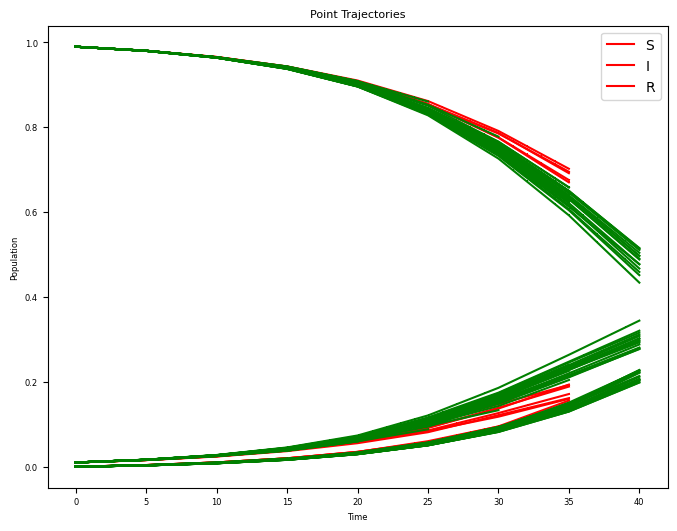

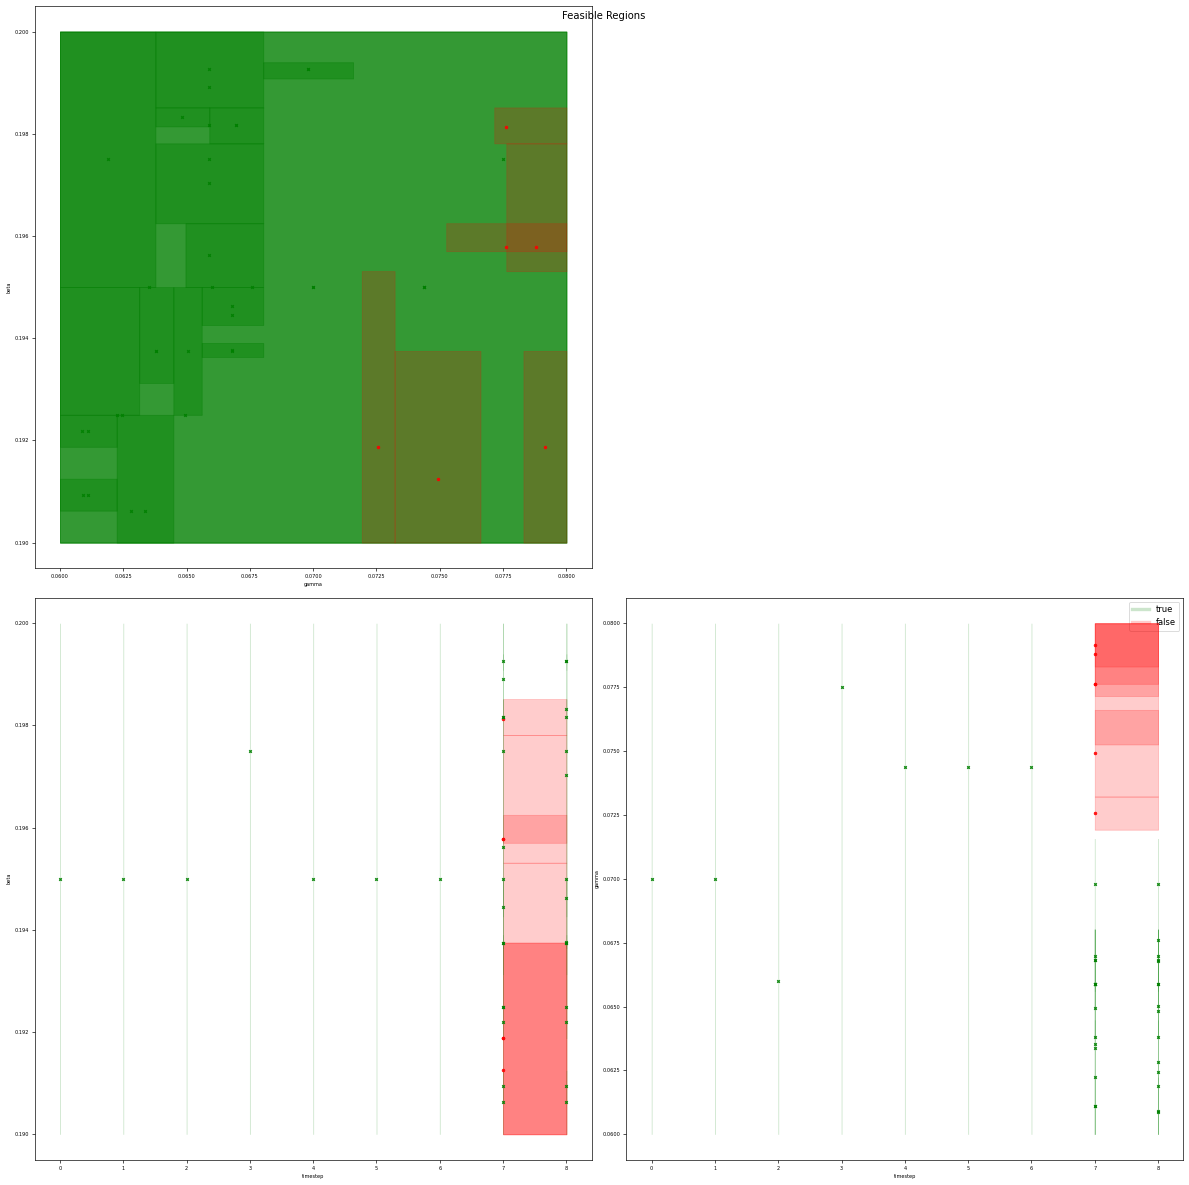

********************************************************************************
********************************************************************************
* Analysis Summary
********************************************************************************
43 Points (+:37, -:6), 43 Boxes (+:37, -:6)
Parameters = {beta[0.19, 0.2): 0.198125, gamma[0.06, 0.08): 0.07762742176137981, S0[0.99, 0.99): 0.99, I0[0.01, 0.01): 0.01, R0[0.0, 0.0): 0.0, N[1.0, 1.0): 1.0}
        # {beta[0.19, 0.2): 0.198125, gamma[0.06, 0.08): 0.07762742176137981, S0[0.99, 0.99): 0.99, I0[0.01, 0.01): 0.01, R0[0.0, 0.0): 0.0, N[1.0, 1.0): 1.0}
                     I    I0    N         R   R0         S    S0      beta     gamma  \
time                                                                           
0.0   0.010000  0.01  1.0  0.000000  0.0  0.990000  0.99  0.198125  0.077627   
1.0   0.011185  0.01  1.0  0.000776  0.0  0.988039  0.99  0.198125  0.077627   
2.0   0.012370  0.01  1.0  0.001553  0.0  0.9

In [2]:
# Parameter Synthesis (M3.3)

STATES = ["S", "I", "R"]
COMPARTMENTS = STATES
MAX_TIME=40
STEP_SIZE=5
to_synthesize=["beta", "gamma"]

REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "sir_request_param_synth.json"
)

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
 
    funman_request.structure_parameters[0].interval.lb = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[0].interval.ub = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[1].interval.lb = STEP_SIZE
    funman_request.structure_parameters[1].interval.ub = STEP_SIZE

    # funman_request.parameter("gamma").interval.lb = 0.025
    # funman_request.parameter("gamma").interval.ub = 0.03
    # funman_request.parameter("beta").interval.lb = 0.13
    # funman_request.parameter("beta").interval.ub = 0.16

    # funman_request.config.substitute_subformulas = True
    # funman_request.config.taylor_series_order = 4
    # series_approximation_threshold = 1e-8

    # funman_request.config.verbosity = 10
    funman_request.config.tolerance = 1e-1
    funman_request.config.compartmental_constraint_noise = 1e-10
    # funman_request.config.solver_timeout = 10
    # funman_request.config.uniform_box_splits = True
    # funman_request.config.num_initial_boxes = 1
    # funman_request.config.save_smtlib = "./out"
    # funman_request.config.dreal_log_level = "info"
    # funman_request.config.dreal_precision = 1e-1

    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIR Parameter Synthesis",
            case_out_dir=SAVED_RESULTS_DIR,
            dump_plot=True,
            parameters_to_plot=to_synthesize+["timestep"],
            dump_results=True
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", parameters_to_plot=to_synthesize+["timestep"], synthesized_parameters=to_synthesize+["timestep"])
    print(summary)

[0.99000, 0.99000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01000, 0.01000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.00000, 0.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[1.00000, 1.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
Automatic initialization of gaol... done
[11.00000, 11.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[11.00000, 11.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[11.00000, 11.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[5.00000, 5.00000) has equal lower a

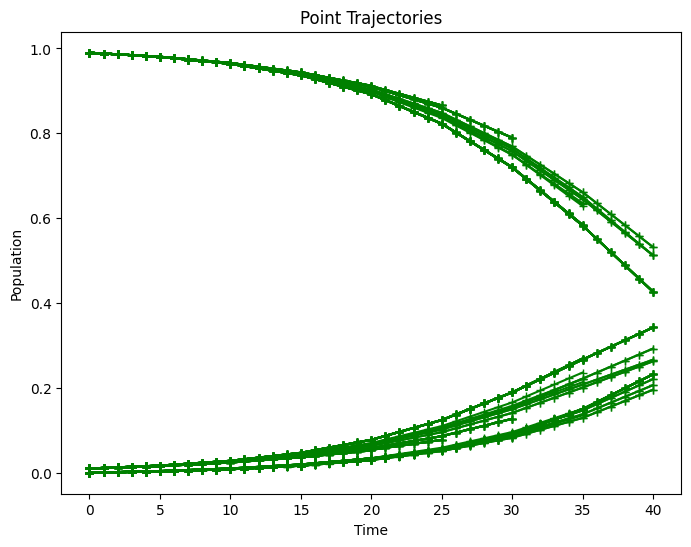

2024-05-03 19:23:11,476 - funman.api.run - INFO - Creating plot of parameter space: ./out/ad79ae41-8057-435a-9e62-5f0f79305bab_parameter_space.png
2024-05-03 19:23:12,887 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.195, 0.19625)][(0.19625, 0.1975)])
2024-05-03 19:23:12,960 - funman.representation.box - INFO - widths: 0.00250 -> 0.00210 0.00210 (raw), 0.25000 -> 0.12500 0.12500 (norm)
2024-05-03 19:23:13,038 - funman.search.box_search - INFO - progress: 0.85960
2024-05-03 19:23:13,116 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.19625, 0.19687500000000002)][(0.19687500000000002, 0.1975)])
2024-05-03 19:23:13,148 - funman.representation.box - INFO - widths: 0.00210 -> 0.00210 0.00210 (raw), 0.12500 -> 0.10481 0.10481 (norm)
2024-05-03 19:23:13,234 - funman.search.box_search - INFO - progress: 0.85960
2024-05-03 19:23:13,343 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.07312615128327474, 0.07417422558967592)][

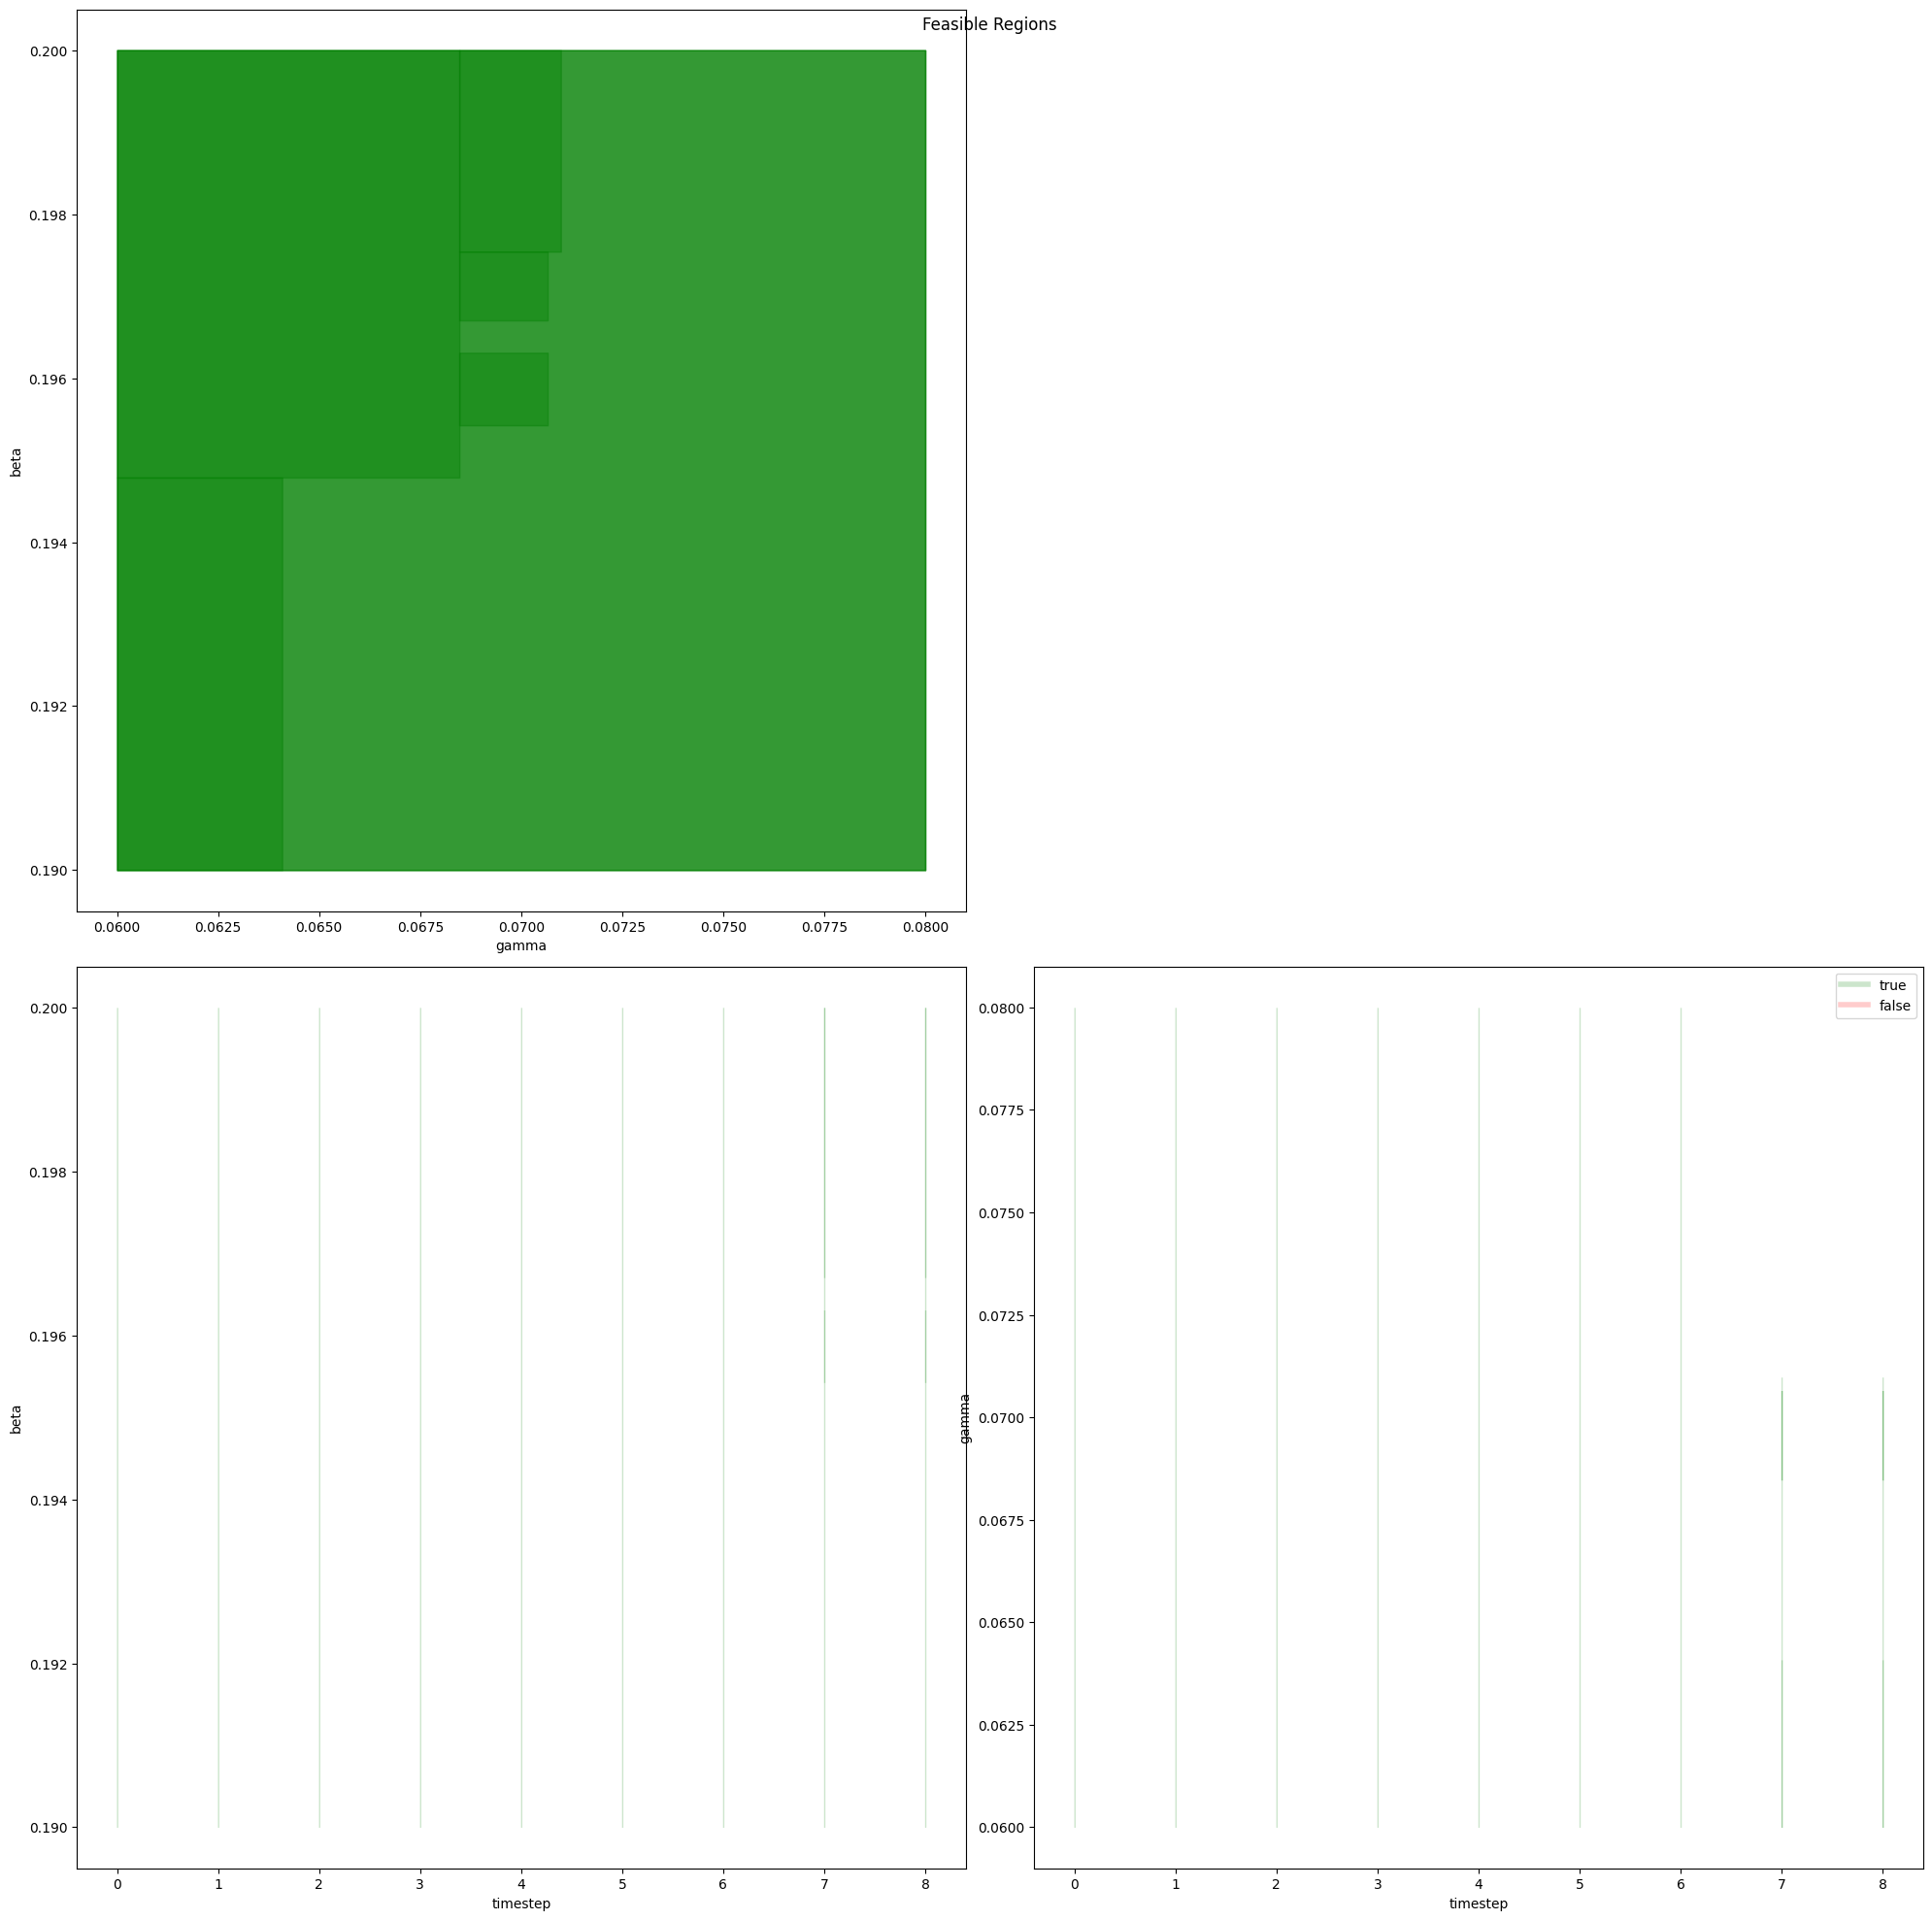

2024-05-03 19:23:49,664 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.19, 0.19094289165402645)][(0.19094289165402645, 0.1918857833080529)])
2024-05-03 19:23:49,668 - funman.representation.box - INFO - widths: 0.00189 -> 0.00102 0.00102 (raw), 0.18858 -> 0.09429 0.09429 (norm)
2024-05-03 19:23:49,676 - funman.search.box_search - INFO - progress: 0.90832
2024-05-03 19:23:49,879 - funman.search.box_search - INFO - progress: 0.91208
2024-05-03 19:23:51,823 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.195, 0.1975)][(0.1975, 0.2)])
2024-05-03 19:23:51,827 - funman.representation.box - INFO - widths: 0.00500 -> 0.00478 0.00478 (raw), 0.50000 -> 0.25000 0.25000 (norm)
2024-05-03 19:23:51,835 - funman.search.box_search - INFO - progress: 0.91208
2024-05-03 19:23:51,869 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.07522229989607708, 0.07615741798567707)][(0.07615741798567707, 0.08)])
2024-05-03 19:23:51,871 - funman.re

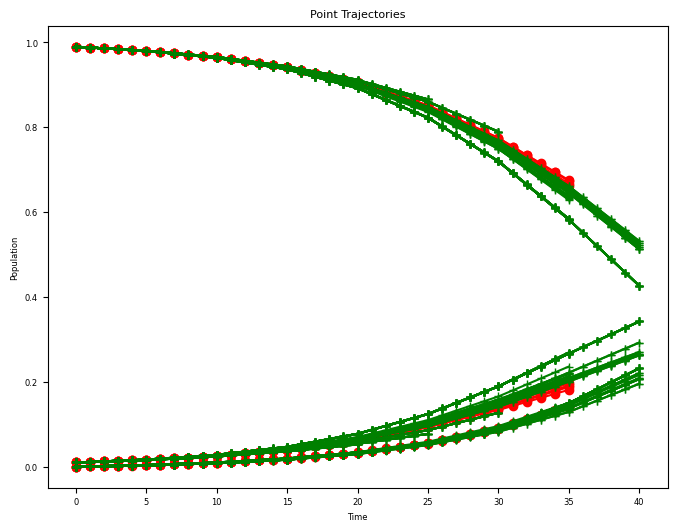

2024-05-03 19:24:20,084 - funman.api.run - INFO - Creating plot of parameter space: ./out/ad79ae41-8057-435a-9e62-5f0f79305bab_parameter_space.png
2024-05-03 19:24:20,856 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.1975, 0.19812500000000002)][(0.19812500000000002, 0.19875)])
2024-05-03 19:24:20,859 - funman.representation.box - INFO - widths: 0.00210 -> 0.00210 0.00210 (raw), 0.12500 -> 0.10481 0.10481 (norm)
2024-05-03 19:24:20,865 - funman.search.box_search - INFO - progress: 0.94675
2024-05-03 19:24:20,885 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.07312615128327474, 0.07417422558967592)][(0.07417422558967592, 0.07522229989607708)])
2024-05-03 19:24:20,887 - funman.representation.box - INFO - widths: 0.00210 -> 0.00105 0.00105 (raw), 0.10481 -> 0.06250 0.06250 (norm)
2024-05-03 19:24:20,893 - funman.search.box_search - INFO - progress: 0.94675
2024-05-03 19:24:24,125 - funman.representation.box - INFO - Split[[7.00000, 8.00000]

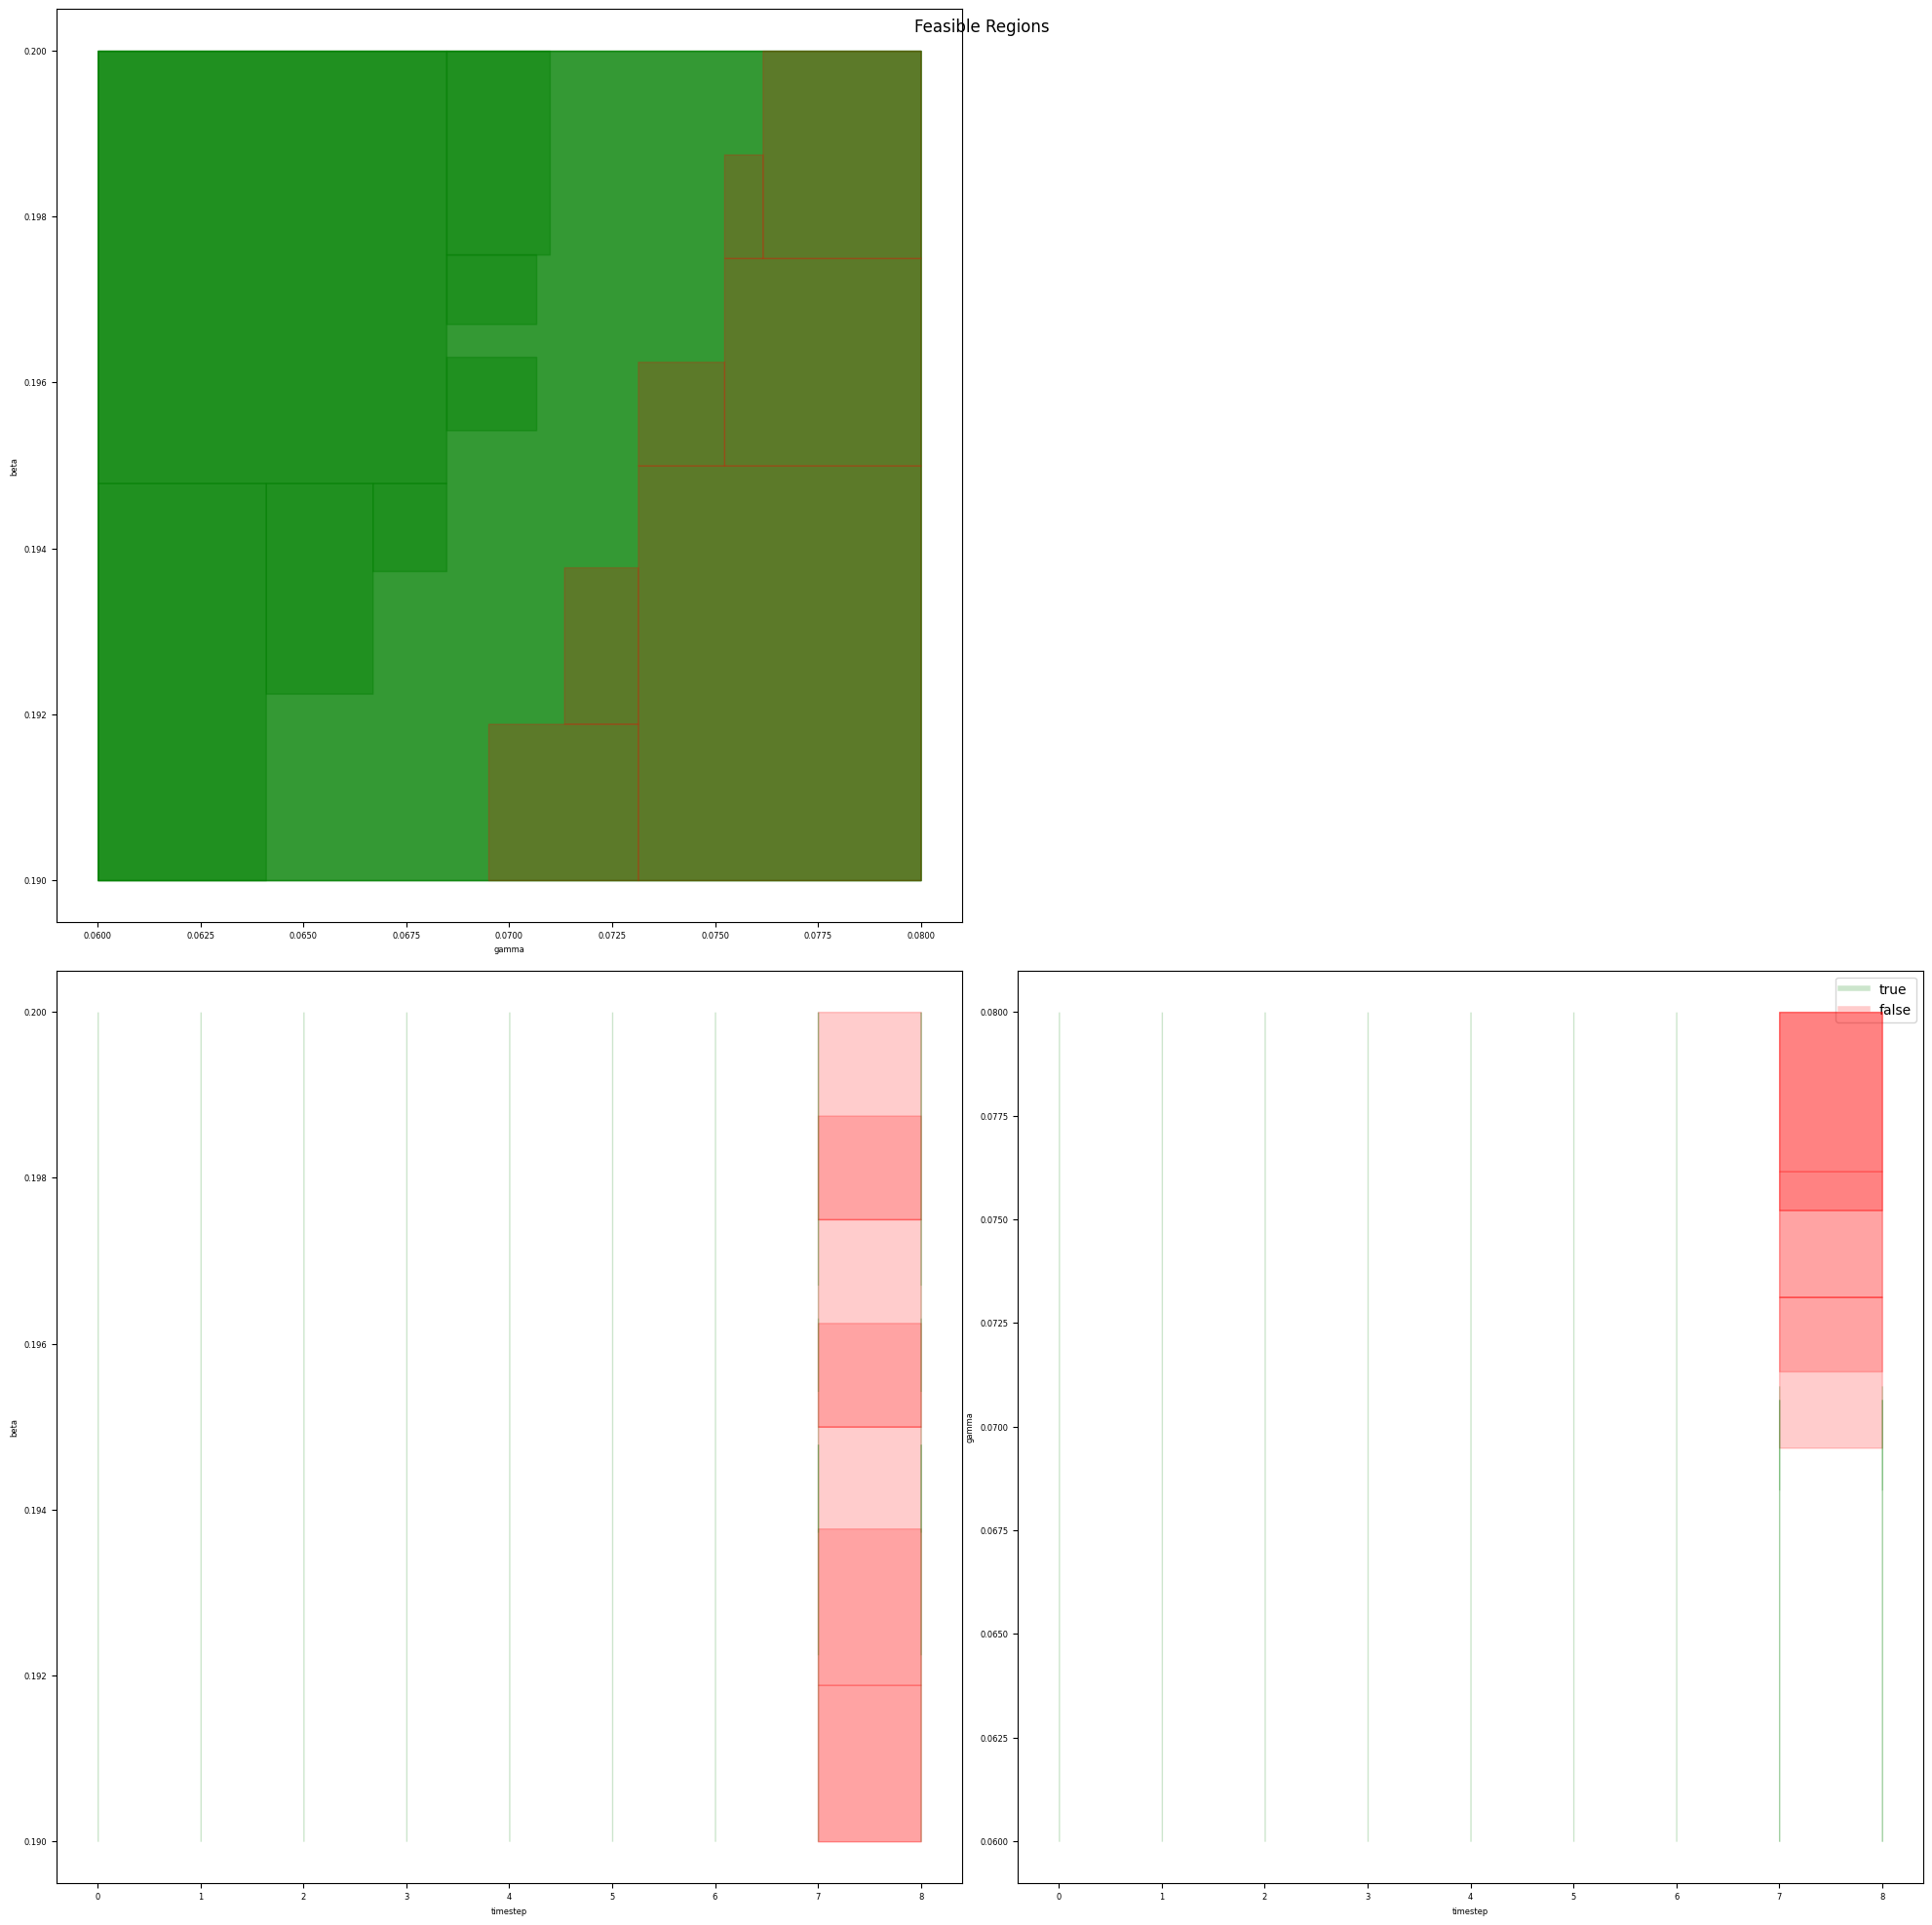

2024-05-03 19:25:08,858 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.19377156661610578, 0.19439672836389885)][(0.19439672836389885, 0.19471855591570367)])
2024-05-03 19:25:08,862 - funman.representation.box - INFO - widths: 0.00247 -> 0.00247 0.00247 (raw), 0.12356 -> 0.12356 0.12356 (norm)
2024-05-03 19:25:08,871 - funman.search.box_search - INFO - progress: 0.95213
2024-05-03 19:25:12,409 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.07065497109968752, 0.07181879875611111)][(0.07181879875611111, 0.07312615128327474)])
2024-05-03 19:25:12,412 - funman.representation.box - INFO - widths: 0.00247 -> 0.00116 0.00131 (raw), 0.12356 -> 0.05819 0.06537 (norm)
2024-05-03 19:25:12,423 - funman.search.box_search - INFO - progress: 0.95213
2024-05-03 19:25:14,140 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](beta[(0.19377156661610578, 0.19416460437795352)][(0.19416460437795352, 0.19439672836389885)])
2024-05-03 19:25:14,143 - 

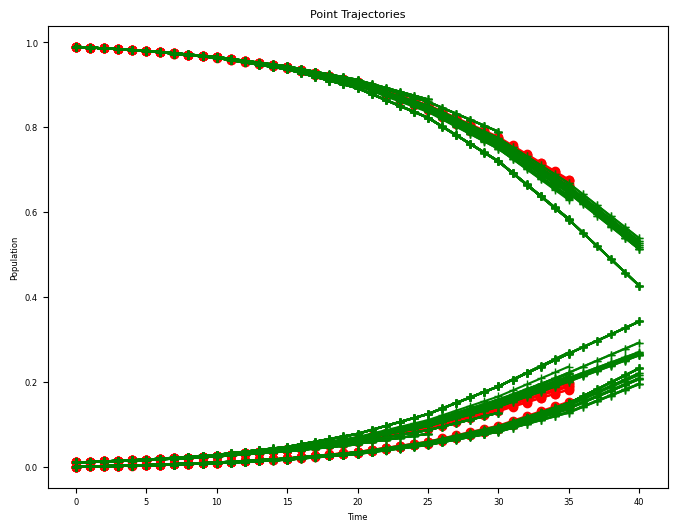

2024-05-03 19:25:34,226 - funman.api.run - INFO - Creating plot of parameter space: ./out/ad79ae41-8057-435a-9e62-5f0f79305bab_parameter_space.png
2024-05-03 19:25:38,565 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.07312615128327474, 0.07417422558967592)][(0.07417422558967592, 0.07522229989607708)])
2024-05-03 19:25:38,570 - funman.representation.box - INFO - widths: 0.00210 -> 0.00105 0.00105 (raw), 0.10481 -> 0.06250 0.06250 (norm)
2024-05-03 19:25:38,577 - funman.search.box_search - INFO - progress: 0.95213
2024-05-03 19:25:42,644 - funman.representation.box - INFO - Split[[7.00000, 8.00000]](gamma[(0.06624042602842978, 0.06735520233899037)][(0.06735520233899037, 0.06846997864955094)])
2024-05-03 19:25:42,646 - funman.representation.box - INFO - widths: 0.00223 -> 0.00111 0.00111 (raw), 0.11148 -> 0.05574 0.05574 (norm)
2024-05-03 19:25:42,656 - funman.search.box_search - INFO - progress: 0.95213
2024-05-03 19:25:46,668 - funman.representation.box - INFO 

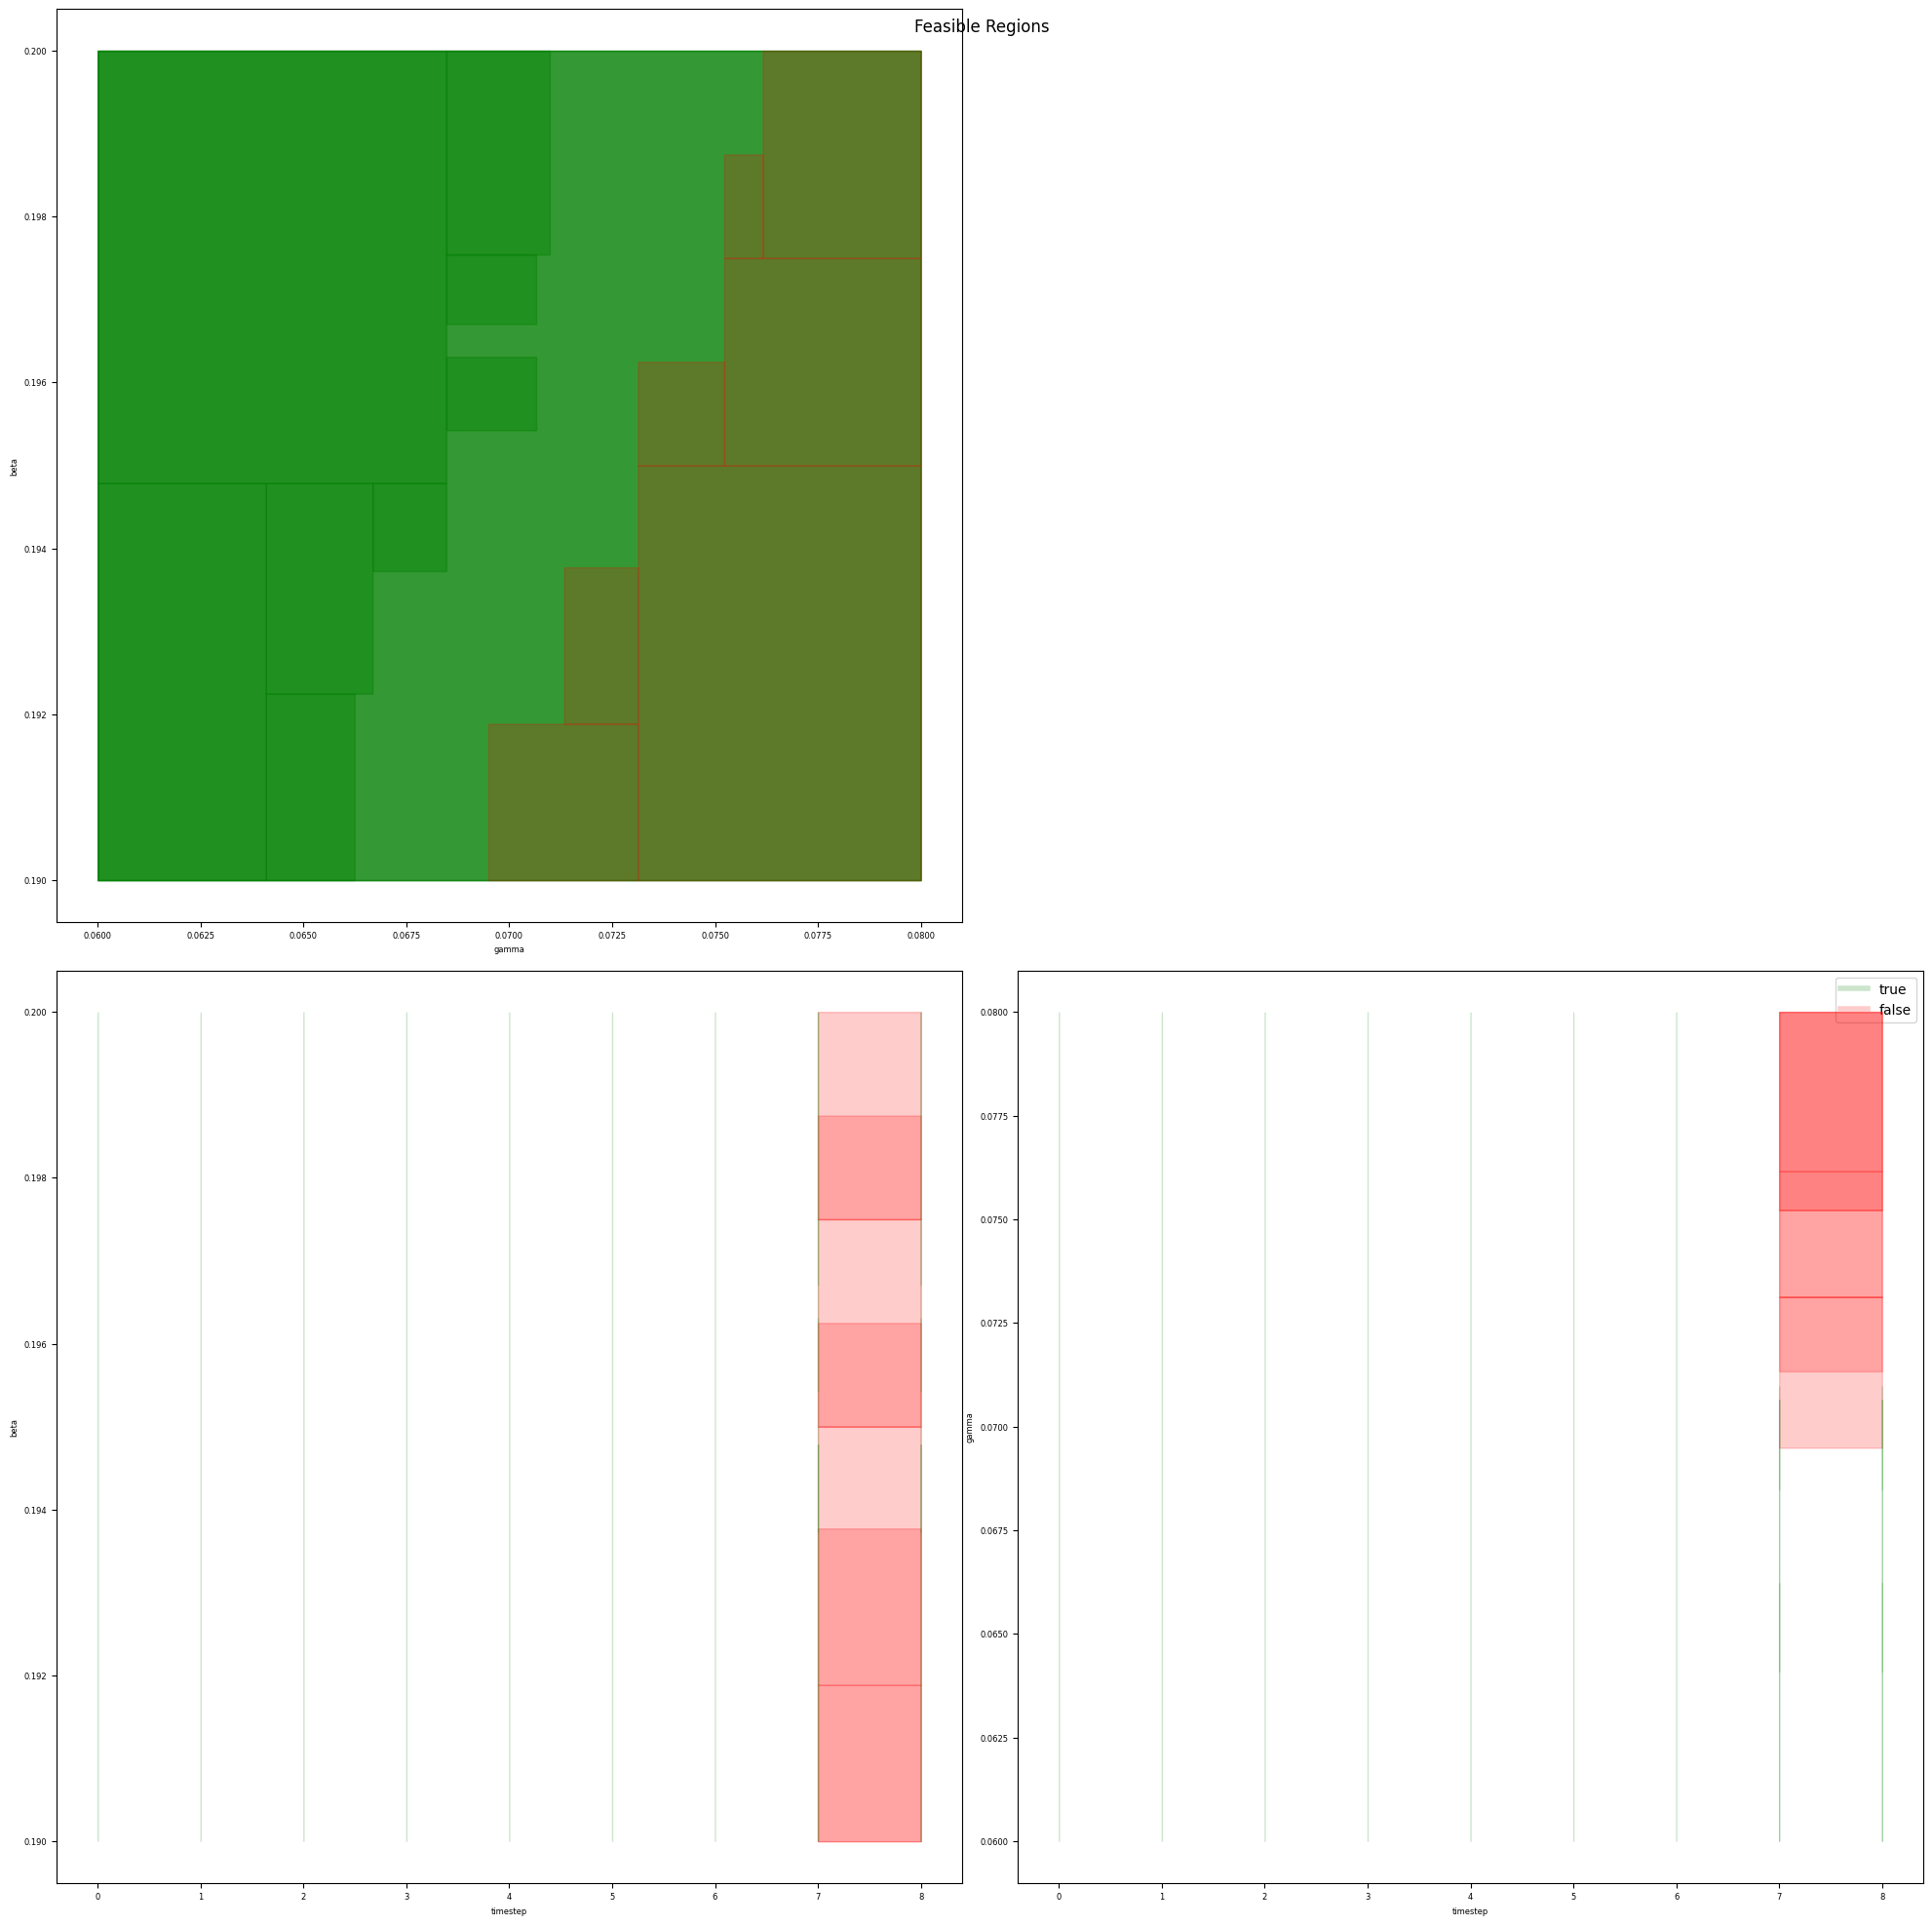

2024-05-03 19:26:11,448 - funman.server.worker - INFO - Worker.stop() acquiring state lock ....
2024-05-03 19:26:11,650 - funman.server.worker - INFO - FunmanWorker exiting...
2024-05-03 19:26:11,653 - funman.server.worker - INFO - Worker.stop() completed.


Total # of ibex-fwdbwd Pruning                @ Pruning level        =         1669654
Total # of ibex-fwdbwd Pruning (zero-effect)  @ Pruning level        =         1208055
Total time spent in Pruning                   @ Pruning level        =        2.170940 sec
Total time spent in making constraints        @ Pruning level        =        0.000000 sec
Total # of Convert                            @ Ibex Converter       =              78
Total time spent in Converting                @ Ibex Converter       =        0.001112 sec


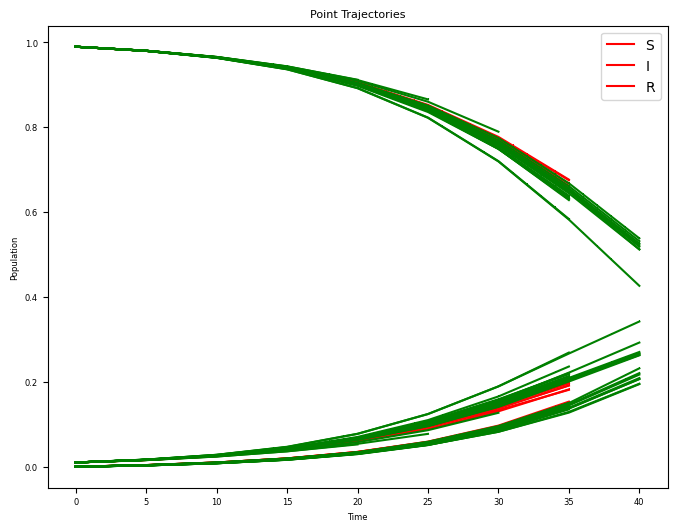

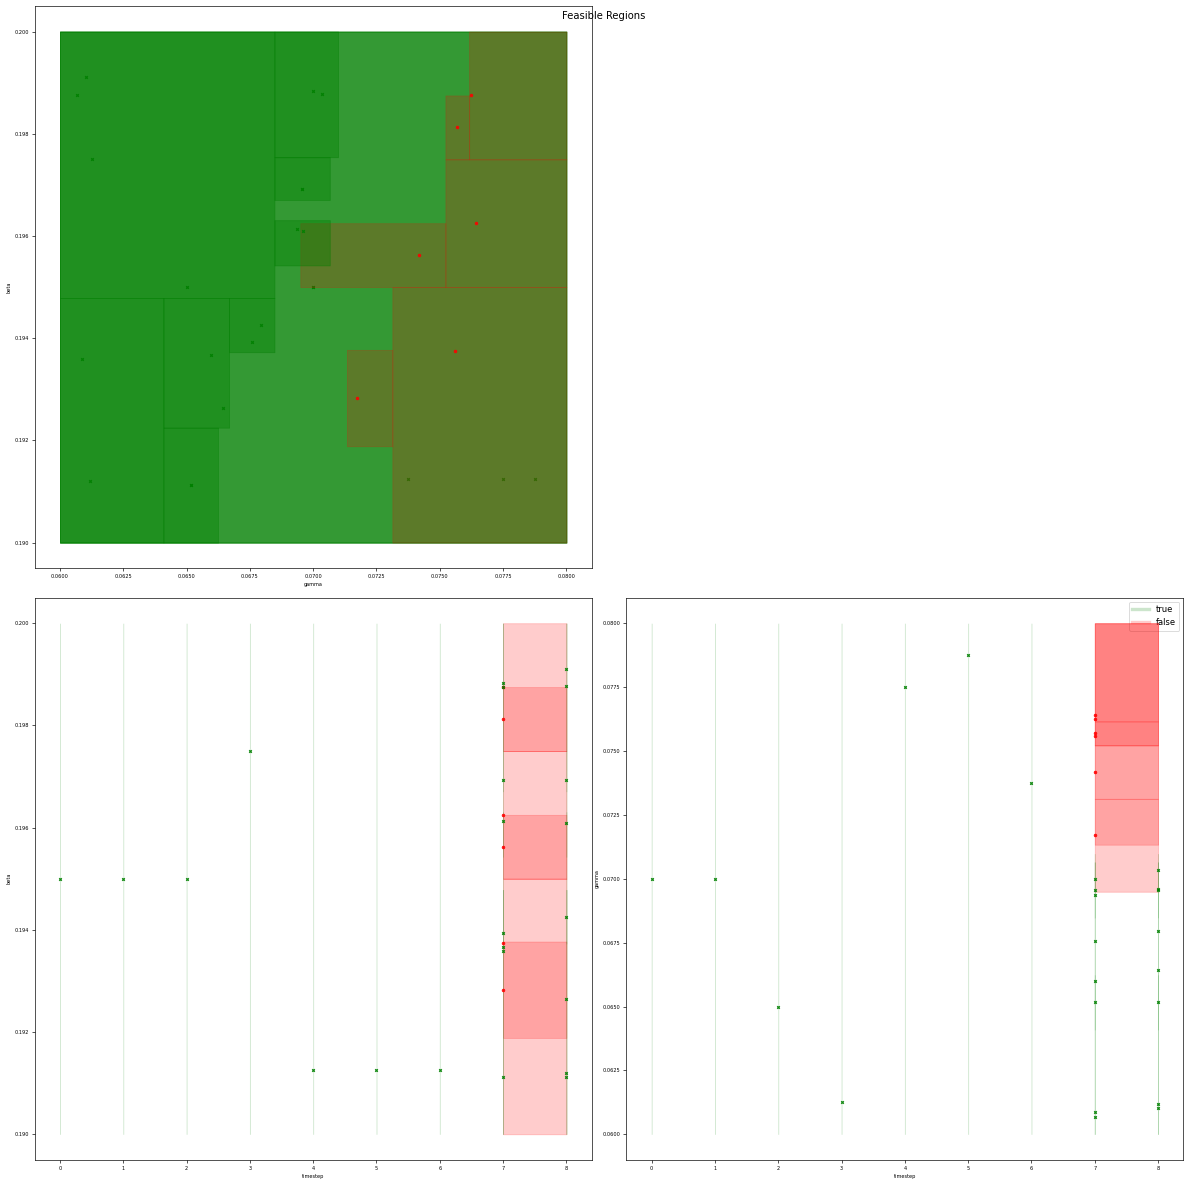

********************************************************************************
********************************************************************************
* Analysis Summary
********************************************************************************
29 Points (+:23, -:6), 29 Boxes (+:23, -:6)
Parameters = {beta[0.19, 0.2): 0.19875, gamma[0.06, 0.08): 0.07624999999999998, S0[0.99, 0.99): 0.99, I0[0.01, 0.01): 0.01, R0[0.0, 0.0): 0.0, N[1.0, 1.0): 1.0}
        # {beta[0.19, 0.2): 0.19875, gamma[0.06, 0.08): 0.07624999999999998, S0[0.99, 0.99): 0.99, I0[0.01, 0.01): 0.01, R0[0.0, 0.0): 0.0, N[1.0, 1.0): 1.0}
                     I    I0    N         R   R0         S    S0     beta    gamma  \
time                                                                         
0.0   0.010000  0.01  1.0  0.000000  0.0  0.990000  0.99  0.19875  0.07625   
1.0   0.011205  0.01  1.0  0.000762  0.0  0.988032  0.99  0.19875  0.07625   
2.0   0.012410  0.01  1.0  0.001525  0.0  0.986065  0.9

In [3]:
# Parameter Synthesis (M3.2)

STATES = ["S", "I", "R"]
COMPARTMENTS = STATES
MAX_TIME=40
STEP_SIZE=5
to_synthesize=["beta", "gamma"]

REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "sir_request_param_synth.json"
)

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
 
    funman_request.structure_parameters[0].interval.lb = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[0].interval.ub = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[1].interval.lb = STEP_SIZE
    funman_request.structure_parameters[1].interval.ub = STEP_SIZE

    # funman_request.parameter("gamma").interval.lb = 0.025
    # funman_request.parameter("gamma").interval.ub = 0.03
    # funman_request.parameter("beta").interval.lb = 0.13
    # funman_request.parameter("beta").interval.ub = 0.16

    # funman_request.config.substitute_subformulas = True
    # funman_request.config.taylor_series_order = 4
    # series_approximation_threshold = 1e-8

    # funman_request.config.verbosity = 10
    funman_request.config.tolerance = 1e-1
    funman_request.config.compartmental_constraint_noise = 1e-10
    # funman_request.config.solver_timeout = 10
    # funman_request.config.uniform_box_splits = True
    # funman_request.config.num_initial_boxes = 1
    # funman_request.config.save_smtlib = "./out"
    # funman_request.config.dreal_log_level = "info"
    funman_request.config.dreal_mcts = False

    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIR Parameter Synthesis",
            case_out_dir=SAVED_RESULTS_DIR,
            dump_plot=True,
            parameters_to_plot=to_synthesize+["timestep"],
            dump_results=True
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", parameters_to_plot=to_synthesize+["timestep"], synthesized_parameters=to_synthesize+["timestep"])
    print(summary)